<div style="text-align: justify; padding:5px; background-color:rgb(252, 253, 255); border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">
    <font color='red'>Mini Jupyter tutorial<br><br>To run each cell, click the cell and press <kbd>Run</kbd> from the menu bar. This will run any Python code or display any text within the selected cell before highlighting the next cell down. There are two types of cell: A <i>text cell</i> of type <kbd>Markdown</kbd> or <kbd>Heading</kbd> and a <i>code cell</i> of type <kbd>Code</kbd> identifiable with the <span style="font-family: courier; color:black; background-color:white;">In[ ]:</span> to the left of the cell</i>. The type of cell is also identifiable from the dropdown menu in the above menu bar to the right of <kbd>Run</kbd>. Any visual results produced by the code (text/figures) are displayed directly below that cell. Press <kbd>Run</kbd> again until you reach the end of the notebook or alternatively click <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart and Run All</kbd>. Should the Jupyter notebook crash for any reason, restart the Jupyter Kernel by clicking <kbd>Kernel</kbd><font color='black'>→</font><kbd>Restart</kbd>, and start again from the top.
        
</div>

# Tutorial 2.5: Metabolomics of Gastric Cancer: Polar Dendrogram
<p style="text-align: justify">
<br>
This tutorial covers the necessary steps for producing both a polar dendrogram and different peak area plots of each cluster using using data from a gastric cancer study.
</p>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

<h2 id="1importpackagesmodules" style="text-align: justify">1. Import Packages/Modules</h2>

<p style="text-align: justify">The first code cell of this tutorial imports <a href="https://docs.python.org/3/tutorial/modules.html"><em>packages</em> and <em>modules</em></a> into the Jupyter environment. <em>Packages</em> and <em>modules</em> provide additional functions and tools beyond the in-built Python modules.
<br></p>
<br>
All the code embedded in this notebook is written using Python (<a href="http://www.python.org">python.org</a>) and JavaScript (<a href="https://www.javascript.com/">javascript.com</a>) and are built upon popular open source packages such as NumPy (<a href="https://numpy.org/">numpy.org</a>), SciPy (<a href="https://www.scipy.org/">scipy.org</a>), Matplotlib (<a href="https://matplotlib.org/">matplotlib.org</a>), Seaborn (<a href="https://seaborn.pydata.org/">seaborn.pydata.org</a>, statsmodels (<a href="www.statsmodels.org/">statsmodels.org</a>), Scikit-learn (<a href="scikit-learn.org/">scikit-learn.org</a>), and Pandas (<a href="https://pandas.pydata.org/">pandas.pydata.org</a>).
    
<em>Note:</em> a tutorial focusing on the python programming language is beyond the scope of this notebook. To learn how to program in Python with Jupyter Notebook please refer to: 
<a href="https://mybinder.org/v2/gh/jakevdp/PythonDataScienceHandbook/master?filepath=notebooks%2FIndex.ipynb">Python Data Science Handbook (Jake VanderPlas, 2016)</a>.

In [1]:
import os
   
home = os.getcwd() + "/"

import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as hierarchy
import multivis

print('All packages successfully loaded')

%load_ext autoreload
%autoreload 2

All packages successfully loaded


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

<h2 style="text-align: justify">2. Load Data and Peak Table</h2>

<p style="text-align: justify">The code cell below loads the <em>Data</em> and <em>Peak</em> tables from an Excel file using <code>loadData()</code>. When this is complete, you should see confirmation that Peak (the Peak worksheet) and Data (the Data worksheet) tables have been loaded.<br>

This dataset has previously been published in (<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4716538/">Chan, A, et al. (2016)</a>) in <i>British Journal of Cancer</i> and has been put into a standardised <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format.
</p>

Please inspect the <a href="GastricCancer_NMR.xlsx">GastricCancer_NMR.xlsx </a>Excel file before using it in this tutorial to understand its structure. To change the dataset to be loaded into the notebook replace <code>filename = 'GastricCancer_NMR.xlsx'</code> with another file with the same <a href="https://en.wikipedia.org/wiki/Tidy_data">Tidy Data</a> format as <a href="GastricCancer_NMR.xlsx">GastricCancer_NMR.xlsx</a>, and then rerun the workflow.

</div></div>

In [2]:
file = 'GastricCancer_NMR.xlsx'

DataTable,PeakTable = multivis.utils.loadData(home + file, DataSheet='Data', PeakSheet='Peak')

Loading table: Peak
Loading table: Data
TOTAL SAMPLES: 123 TOTAL PEAKS: 149
Done!


<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Data Table

Check the Data Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTable)</span><br>
</div>

In [3]:
display(DataTable)

Idx    SampleID SampleType                   Class     M1       M2  \
1      2    sample_2     Sample          Gastric Cancer   43.0    525.7   
2      3    sample_3     Sample  Benign Gastric Disease  214.3  10703.2   
3      4    sample_4     Sample                 Healthy   31.6     59.7   
4      5    sample_5     Sample          Gastric Cancer   81.9    258.7   
5      6    sample_6     Sample  Benign Gastric Disease  196.9    128.2   
..   ...         ...        ...                     ...    ...      ...   
119  134  sample_134     Sample  Benign Gastric Disease  133.9    172.6   
120  135  sample_135     Sample                 Healthy    7.5    390.5   
121  137  sample_137     Sample          Gastric Cancer  405.3    510.7   
122  138  sample_138     Sample  Benign Gastric Disease   45.4    191.6   
123  139  sample_139     Sample                 Healthy   30.7     56.8   

        M3     M4     M5     M6  ...   M140    M141   M142    M143   M144  \
1    130.2    NaN  694.5  114.5  ...   84.2   357.1   16.1   455.5   29.5   
2    104.7   46.8  483.4  152.3  ...  993.5  1698.5   32.9    75.9   33.2   
3     86.4   14.0   88.6   10.3  ...   58.1    83.5   60.5   136.9   17.0   
4    315.1    8.7  243.2   18.4  ...   44.5    47.6   45.6  1441.7   35.2   
5    862.5   18.7  200.1    4.7  ...  143.8   157.2   10.4   182.1   32.6   
..     ...    ...    ...    ...  ...    ...     ...    ...     ...    ...   
119  121.5  128.4  324.6   79.7  ...   69.3   268.4    7.1    62.7   27.4   
120   67.9   38.4   58.9   26.5  ...   99.7   184.4    1.7    94.7   32.3   
121  521.9   91.9  732.1  145.7  ...  434.8    84.8  182.3   110.7  123.9   
122   41.0   18.7   40.8   32.2  ...   45.3    44.5   14.5    83.8   27.9   
123   35.9   20.9   17.4    NaN  ...   28.0    38.7    1.3   130.9   24.6   

      M145   M146   M147    M148   M149  
1     28.1   35.8  316.1   390.7  199.0  
2    802.8  967.6  154.4    31.6  195.2  
3     10.2   24.7   64.1    91.4   91.6  
4      0.1   22.8  135.0   322.3  254.3  
5    435.1  325.3  162.4   129.7  207.2  
..     ...    ...    ...     ...    ...  
119    2.8   32.5  249.6  1868.7  325.8  
120    NaN    5.8  174.2     NaN  145.5  
121    0.4   36.3   60.1   317.3  401.7  
122    0.3    0.5   47.3    47.8   46.5  
123    0.7    5.9   20.7   124.1   28.9  

[123 rows x 153 columns]

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table

Check the Peak Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTable)</span><br>
</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 3. Calculate the percentage of missing values in the data

</div>

In [4]:
stats_missing = multivis.utils.statistics(PeakTable, DataTable)

stats_missing.help()

Generate a table of parametric or non-parametric statistics and merges them with the Peak Table (node table).
        Initial_Parameters
            ----------
            peaktable : Pandas dataframe containing peak data. Must contain 'Name' and 'Label'.
            datatable : Pandas dataframe matrix containing values for statistical analysis

        Methods
            -------
            set_params : Set parameters -
                parametric: Perform parametric statistical analysis, assuming the data is normally distributed (default: True)
                log_data: Perform a log ('natural', base 2 or base 10) on all data prior to statistical analysis (default: (False, 2))
                scale_data: Scale the data ('standard' (centers to the mean and scales to unit variance), 'minmax' (scales between 0 and 1), 'maxabs' (scales to the absolute maximum value), 'robust' (centers to the median and scales to between 25th and 75th quantile range) (default: (True, 'standard'))
        

In [5]:
params = dict({'parametric': False
              , 'log_data': (False, 2)
              , 'scale_data': (False, 'minmax')
              , 'impute_data': (False, 3)  
              , 'group_column_name': 'Class'
              , 'control_group_name': 'Healthy'
              , 'group_alpha_CI': 0.05
              , 'fold_change_alpha_CI': 0.05
              , 'pca_alpha_CI': 0.05
              , 'total_missing': True
              , 'group_missing': True
              , 'pca_loadings': False
              , 'normality_test': False
              , 'group_normality_test': False
              , 'group_mean_CI': False
              , 'group_median_CI': False
              , 'mean_fold_change': False
              , 'median_fold_change': False
              , 'kruskal_wallis_test': False
              , 'levene_twoGroup': False
              , 'levene_allGroup': False
              , 'oneway_Anova_test': False
              , 'ttest_oneGroup': False
              , 'ttest_twoGroup': False
              , 'mann_whitney_u_test': False})

stats_missing.set_params(**params)

PeakTablePercentMissing = stats_missing.calculate()

In [6]:
display(PeakTablePercentMissing)

Idx  Name                    Label     Score      VIP1    Pvalue  \
0      0    M1        1_3-Dimethylurate  0.273432  0.921751  0.899999   
1      1    M2  1_6-Anhydro-β-D-glucose  0.386187  2.071139  0.586879   
2      2    M3     1_7-Dimethylxanthine  0.122120  2.892664  0.068365   
3      3    M4     1-Methylnicotinamide  0.781881  2.360494  0.877783   
4      4    M5           2-Aminoadipate  0.412730  2.969282  0.312104   
..   ...   ...                      ...       ...       ...       ...   
144  144  M145                    uarm1  0.226951  0.805725  0.584023   
145  145  M146                    uarm2  0.370446  2.261353  0.882148   
146  146  M147                β-Alanine  0.853027  2.679534  0.679136   
147  147  M148        π-Methylhistidine  0.116367  2.554018  0.839549   
148  148  M149        τ-Methylhistidine  0.870186  0.739459  0.445225   

        QC_RSD  Percent_Group_Benign Gastric Disease_Missing  \
0    32.208005                                          10.0   
1    31.178028                                           0.0   
2    34.990605                                           7.5   
3    12.804201                                           7.5   
4     9.372664                                           5.0   
..         ...                                           ...   
144  41.406985                                          10.0   
145  34.458172                                           2.5   
146  27.623517                                           0.0   
147  16.561921                                           0.0   
148   8.351801                                           0.0   

     Percent_Group_Gastric Cancer_Missing  Percent_Group_Healthy_Missing  \
0                               11.627907                           12.5   
1                                2.325581                            0.0   
2                                2.325581                            7.5   
3                               16.279070                            5.0   
4                                0.000000                            0.0   
..                                    ...                            ...   
144                             13.953488                           35.0   
145                              0.000000                            7.5   
146                              2.325581                            2.5   
147                              0.000000                            5.0   
148                              0.000000                            0.0   

     Percent_Total_Missing  
0                11.382114  
1                 0.813008  
2                 5.691057  
3                 9.756098  
4                 1.626016  
..                     ...  
144              19.512195  
145               3.252033  
146               1.626016  
147               1.626016  
148               0.000000  

[149 rows x 11 columns]

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 4. Data cleaning with QC_RSD (QC relative standard deviation) and the total percentage missing values

</div>

In [7]:
# Remove any features with >=25% QC_RSD and >=10% missing values
PeakTableClean = PeakTablePercentMissing.query('QC_RSD < 25 & Percent_Total_Missing < 10')
peaklist = PeakTableClean['Name'] 
X = DataTable[peaklist]
DataTableClean = pd.merge(DataTable.T[~DataTable.T.index.isin(PeakTable['Name'])].T.reset_index(drop=True), pd.DataFrame(X, columns=peaklist).reset_index(drop=True), left_index=True, right_index=True)

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Data Table post data cleanup

Check the cleaned Data Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(DataTableClean)</span><br>
</div>

In [8]:
display(DataTableClean)

Idx    SampleID SampleType                   Class     M4     M5     M7  \
0      2    sample_2     Sample          Gastric Cancer    NaN  694.5   37.9   
1      3    sample_3     Sample  Benign Gastric Disease   46.8  483.4  110.1   
2      4    sample_4     Sample                 Healthy   14.0   88.6  170.3   
3      5    sample_5     Sample          Gastric Cancer    8.7  243.2  349.4   
4      6    sample_6     Sample  Benign Gastric Disease   18.7  200.1   37.3   
..   ...         ...        ...                     ...    ...    ...    ...   
118  134  sample_134     Sample  Benign Gastric Disease  128.4  324.6   38.9   
119  135  sample_135     Sample                 Healthy   38.4   58.9   42.3   
120  137  sample_137     Sample          Gastric Cancer   91.9  732.1  492.6   
121  138  sample_138     Sample  Benign Gastric Disease   18.7   40.8   46.5   
122  139  sample_139     Sample                 Healthy   20.9   17.4   12.9   

        M8     M11    M14  ...   M130   M133    M134    M137    M138   M142  \
0    125.7   490.6    NaN  ...  100.1  148.5  6674.1   938.9  6084.5   16.1   
1     85.1  2441.2   29.3  ...   42.8  129.8   787.2  1163.2   246.0   32.9   
2     23.9   140.7   62.9  ...   31.3   22.1   392.4   370.6   109.3   60.5   
3     61.1    48.7   77.8  ...    NaN   58.5   973.9   984.0  1037.4   45.6   
4    243.7   103.7   52.3  ...   75.9   76.5     NaN  2916.5  1732.1   10.4   
..     ...     ...    ...  ...    ...    ...     ...     ...     ...    ...   
118  162.0   112.7  133.9  ...   51.7   43.4  1243.5   896.6  2179.1    7.1   
119   62.3    23.2   39.0  ...   27.9   45.5   324.1   288.4    68.5    1.7   
120   95.1   194.7  166.7  ...   96.8  205.9  2731.0   683.1  3241.9  182.3   
121   25.9    50.7   26.3  ...    4.6   14.9   207.1    68.0   241.5   14.5   
122   12.0    21.7   12.9  ...   11.6   15.1   338.8   283.6   291.8    1.3   

       M143   M144    M148   M149  
0     455.5   29.5   390.7  199.0  
1      75.9   33.2    31.6  195.2  
2     136.9   17.0    91.4   91.6  
3    1441.7   35.2   322.3  254.3  
4     182.1   32.6   129.7  207.2  
..      ...    ...     ...    ...  
118    62.7   27.4  1868.7  325.8  
119    94.7   32.3     NaN  145.5  
120   110.7  123.9   317.3  401.7  
121    83.8   27.9    47.8   46.5  
122   130.9   24.6   124.1   28.9  

[123 rows x 73 columns]

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table post data cleanup

Check the cleaned Peak Table simply by calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTableClean)</span><br>
</div>

In [9]:
display(PeakTableClean)

Idx  Name                 Label     Score      VIP1    Pvalue     QC_RSD  \
3      3    M4  1-Methylnicotinamide  0.781881  2.360494  0.877783  12.804201   
4      4    M5        2-Aminoadipate  0.412730  2.969282  0.312104   9.372664   
6      6    M7       2-Furoylglycine  0.621606  2.910225  0.422395   5.049156   
7      7    M8  2-Hydroxyisobutyrate  0.339914  0.636861  0.040471   5.132340   
10    10   M11    3-Aminoisobutyrate  0.052613  1.232261  0.911207  15.476165   
..   ...   ...                   ...       ...       ...       ...        ...   
141  141  M142                   u43  0.481533  2.794356  0.403690   7.151166   
142  142  M143                  u433  0.602162  1.008852  0.477379  24.826144   
143  143  M144                   u87  0.090389  2.602484  0.910527   6.635486   
147  147  M148     π-Methylhistidine  0.116367  2.554018  0.839549  16.561921   
148  148  M149     τ-Methylhistidine  0.870186  0.739459  0.445225   8.351801   

     Percent_Group_Benign Gastric Disease_Missing  \
3                                             7.5   
4                                             5.0   
6                                             7.5   
7                                             0.0   
10                                           10.0   
..                                            ...   
141                                           0.0   
142                                           0.0   
143                                           0.0   
147                                           0.0   
148                                           0.0   

     Percent_Group_Gastric Cancer_Missing  Percent_Group_Healthy_Missing  \
3                               16.279070                            5.0   
4                                0.000000                            0.0   
6                                0.000000                            2.5   
7                                0.000000                            0.0   
10                               4.651163                            2.5   
..                                    ...                            ...   
141                              2.325581                            0.0   
142                              4.651163                            0.0   
143                              0.000000                            0.0   
147                              0.000000                            5.0   
148                              0.000000                            0.0   

     Percent_Total_Missing  
3                 9.756098  
4                 1.626016  
6                 3.252033  
7                 0.000000  
10                5.691057  
..                     ...  
141               0.813008  
142               1.626016  
143               0.000000  
147               1.626016  
148               0.000000  

[69 rows x 11 columns]

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 5. Statistical analysis

Statistical analysis is important to identify any features or samples which may be outliers. 
It is also important to identify whether the data is normally distributed prior to any further analysis such as correlation analysis. Whether the data is normally distrubuted or not can determine the most suitable correlation function to use. For example the parametric method Pearson's correlation should be used for normally distributed data, whereas the non-parametric method Spearman's correlation is suitable for non-normally distributed data.

Statistical analysis can also provide additional univariate information for futher down-stream visualisations, such as one-way Anova p-values and PCA loadings for each feature to be represented for each of the nodes in the spring-embedded network plot or other visualisation methods. In this way the network visualisation can considered a multivariate clustering method.
</div>

In [10]:
stats = multivis.utils.statistics(PeakTableClean, DataTableClean)

stats.help()

Generate a table of parametric or non-parametric statistics and merges them with the Peak Table (node table).
        Initial_Parameters
            ----------
            peaktable : Pandas dataframe containing peak data. Must contain 'Name' and 'Label'.
            datatable : Pandas dataframe matrix containing values for statistical analysis

        Methods
            -------
            set_params : Set parameters -
                parametric: Perform parametric statistical analysis, assuming the data is normally distributed (default: True)
                log_data: Perform a log ('natural', base 2 or base 10) on all data prior to statistical analysis (default: (False, 2))
                scale_data: Scale the data ('standard' (centers to the mean and scales to unit variance), 'minmax' (scales between 0 and 1), 'maxabs' (scales to the absolute maximum value), 'robust' (centers to the median and scales to between 25th and 75th quantile range) (default: (True, 'standard'))
        

In [11]:
params = dict({'parametric': False
              , 'log_data': (True, 2)
              , 'scale_data': (False, 'minmax') 
              , 'impute_data': (True, 3)
              , 'group_column_name': 'Class'
              , 'control_group_name': 'Healthy'
              , 'group_alpha_CI': 0.05
              , 'fold_change_alpha_CI': 0.05
              , 'pca_alpha_CI': 0.05
              , 'total_missing': False
              , 'group_missing': False
              , 'pca_loadings': False
              , 'normality_test': True
              , 'group_normality_test': False
              , 'group_mean_CI': False
              , 'group_median_CI': False
              , 'mean_fold_change': False
              , 'median_fold_change': False
              , 'kruskal_wallis_test': False
              , 'levene_twoGroup': False
              , 'levene_allGroup': False
              , 'oneway_Anova_test': False
              , 'ttest_oneGroup': False
              , 'ttest_twoGroup': False
              , 'mann_whitney_u_test': True})

stats.set_params(**params)

PeakTableStats = stats.calculate()

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Display the Peak Table with statistical information: Shapiro-Wilk's pvalue

Check the imported Peak table with statistical information by simply calling the function <span style="font-family: monaco; font-size: 14px; background-color:white;">display(PeakTableStats)</span><br>
</div>

In [12]:
display(PeakTableStats)

Idx  Name                 Label     Score      VIP1    Pvalue     QC_RSD  \
0     0    M4  1-Methylnicotinamide  0.781881  2.360494  0.877783  12.804201   
1     1    M5        2-Aminoadipate  0.412730  2.969282  0.312104   9.372664   
2     2    M7       2-Furoylglycine  0.621606  2.910225  0.422395   5.049156   
3     3    M8  2-Hydroxyisobutyrate  0.339914  0.636861  0.040471   5.132340   
4     4   M11    3-Aminoisobutyrate  0.052613  1.232261  0.911207  15.476165   
..  ...   ...                   ...       ...       ...       ...        ...   
64   64  M142                   u43  0.481533  2.794356  0.403690   7.151166   
65   65  M143                  u433  0.602162  1.008852  0.477379  24.826144   
66   66  M144                   u87  0.090389  2.602484  0.910527   6.635486   
67   67  M148     π-Methylhistidine  0.116367  2.554018  0.839549  16.561921   
68   68  M149     τ-Methylhistidine  0.870186  0.739459  0.445225   8.351801   

    Percent_Group_Benign Gastric Disease_Missing  \
0                                            7.5   
1                                            5.0   
2                                            7.5   
3                                            0.0   
4                                           10.0   
..                                           ...   
64                                           0.0   
65                                           0.0   
66                                           0.0   
67                                           0.0   
68                                           0.0   

    Percent_Group_Gastric Cancer_Missing  Percent_Group_Healthy_Missing  \
0                              16.279070                            5.0   
1                               0.000000                            0.0   
2                               0.000000                            2.5   
3                               0.000000                            0.0   
4                               4.651163                            2.5   
..                                   ...                            ...   
64                              2.325581                            0.0   
65                              4.651163                            0.0   
66                              0.000000                            0.0   
67                              0.000000                            5.0   
68                              0.000000                            0.0   

    Percent_Total_Missing  MannWhitneyU_statistic_Benign Gastric Disease  \
0                9.756098                                          784.0   
1                1.626016                                          625.5   
2                3.252033                                          713.0   
3                0.000000                                          789.5   
4                5.691057                                          797.0   
..                    ...                                            ...   
64               0.813008                                          562.0   
65               1.626016                                          807.0   
66               0.000000                                          626.5   
67               1.626016                                          599.5   
68               0.000000                                          676.0   

    MannWhitneyU_pvalue_Benign Gastric Disease  \
0                                     0.881436   
1                                     0.094065   
2                                     0.405202   
3                                     0.923341   
4                                     0.980808   
..                                         ...   
64                                    0.022281   
65                                    0.950128   
66                                    0.095894   
67                                    0.054289   
68                                    0.234684   

   

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Determine if the data is normally distributed

If the majority of the data shows a Shapiro-Wilks pvalue > 0.05 the data is normally distributed and parametric statistical analysis is recommended, however if the pvalue is < 0.05 then the data is non-normally distributed and non-parametric analysis methods are recommended.
</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Features normally distributed

In [13]:
display(len(PeakTableStats.query('Shapiro_pvalue > 0.05')))

24

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Features non-normally distributed

In [14]:
display(len(PeakTableStats.query('Shapiro_pvalue < 0.05')))

45

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Normality conclusion

The data is non-normally distributed and therefore non-parametric analysis (e.g. Kruskal-Wallis, Mann-Whitney U test, Spearman's correlation etc) is recommended.

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 6. Log transform and impute remaining missing values prior to HCA and polar dendrogram
    
Transformation can be done with a log to approximate a normal distribution, commonly used for biological data types, however there are other types such as square, square root, cube root or reciprocal transformation, which may be suitable for other types of data. Scaling is highly dependent on the values found in the dataset. If the dataset contains a number of values which are very large compared to the majority of other values, then this may skew the data in favour of those values and consequently bias the results. Scaling is performed so that all values are comparable. Scaling methods such as 'standard', which centers around a mean of 0 and scales to a standard deviation of 1 (unit variance) is good if you want the data to approximate a normal distribution for parametric univariate statistical analysis, however it is prone to the effects of outliers and larger standard deviations will appear to have a bigger affect (maximise variation) which is suitable for PCA. Other methods such as 'minmax' scales the data between a minimum and maximum value (usually 0 and 1), and 'maxabs' which scales around the maximum absolute value. Both 'minmax' and 'maxabs' can perform similarly to each other if the data is positive and both maintains the shape of the distribution, unlike the 'standard' method. The 'robust' method centers around the median and scales to a lower and upper quantile range, and is robust to the presence of outliers. Pearson correlation, a parametric method, can later be performed where a log is necessary to normally distribute the data. However, if a non-parametric method is used, such as Spearman or Kendall's Tau, then a log is not necessary. Additionally, where a correlation is used no scaling is necessary after log transformation, as correlation analysis does not require scaling, as covariance is measured between individual values in the bivariate correlation analysis, unlike with PCA in tutorial 2.1, which performs multivariate analysis, measuring the variance across all values. However, if another similarity metric were to be used in place of correlation, such as Euclidean distance, then scaling may be a necessary step to take.
</div>

In [15]:
peaklist = PeakTableClean['Name']                        # Set peaklist to the metabolite names in the DataTableClean
X = DataTableClean[peaklist]                             # Extract X matrix from DataTable using peaklist
Xlog = np.log2(X)                                        # Log transform (base-2)
#Xscale = multivis.utils.scaler(Xlog, type='standard')   # Center to a mean of 0 and scale to unit variance
Xlog = multivis.utils.imputeData(Xlog, k=3)              # Impute remaining missing values using KNN impute with k=3

DataTableLogged = pd.merge(DataTable.T[~DataTable.T.index.isin(PeakTable['Name'])].T.reset_index(drop=True), pd.DataFrame(Xlog, columns=peaklist).reset_index(drop=True), left_index=True, right_index=True)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 7. Correlation analysis

Correlation is a form of similarity and measures the strength of the linear relationship between two variables. Pearson's correlation, a form of parametric correlation analysis, is described mathematically by dividing the joint variability or covariance of two variables by the product of their standard deviations (see Eq1). Other forms of correlation measure the monotonic relationships and are non-parametric, such as Spearman’s rank correlation and Kendall Tau's correlation. The following correlation analysis, allows for Pearson, Spearman or Kendall Tau's correlation analysis.

\begin{equation*}
r = \frac{Cov(X,Y)}{SD(X).SD(Y)}
\end{equation*}
<center>Eq1: Pearson’s correlation coefficient</center>

</div>

In [16]:
correlationType = "spearman"; #"pearson"; "kendalltau"

X = DataTableLogged[PeakTableClean['Name']]

Scores,Pvalues = multivis.utils.corrAnalysis(X, correlationType)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 69/69 [00:00<00:00, 113.67it/s]


<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 8. Hierarchical Cluster Analysis (HCA)

Hierachical Cluster Analaysis (HCA) orders variables by similarity and then performs clustering based on the similarities/disimilarities of the samples and features in the data, and then clusters them using a linkage cluster method. If the data is correlated the correlations are first preprocessed and then clustered, otherwise a distance metric is applied to non-correlated data before clustering. If instead Euclidean or another distance metric is used in place of correlation, then scaling may be necessary prior to this step.

</div>

In [17]:
distance_metric = "none" #"euclidean"; #"correlation" # Applied only to non-correlated data
transpose_non_correlated = True; # Transpose data if it is not a correlation matrix
is_correlated = True; # Specficy if input data is a correlation matrix
linkage_method = "ward";

matrix,row_linkage,col_linkage = multivis.utils.cluster(Scores, transpose_non_correlated, is_correlated, distance_metric, linkage_method)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 9. Generate a cartesian dendrogram

Dendrograms or tree diagrams are a means to visually depict the hierarchical structure of the similarities/distacnes between individuals derived from HCA. The distances between branches in the dendrogram represent the similarities/distances between individuals. The following cartesian dendrogram is generated from the row linkage data from the HCA in step 7.

</div>

In [18]:
color_threshold = 0.90;

hierarchy.set_link_color_palette(['green', 'red', 'cyan', 'magenta', 'yellow', 'blue', 'black', 'orange'])
#hierarchy.set_link_color_palette(['g', 'r', 'c', 'm', 'y', 'b', 'k', 'w'])
#hierarchy.set_link_color_palette(None)

dn = hierarchy.dendrogram(row_linkage, labels=list(PeakTableClean.index), no_plot=True, color_threshold=color_threshold)

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 10. Plot Polar dendrogram

A polar dendroam is simply a circular form of the cartesian dendrogram from step 9, allowing for more information from the dendrogram to be displayed in a small space for easier visualisation.

</div>

In [19]:
polarDendro = multivis.polarDendrogram(dn)

polarDendro.help()

Produces a polar dendrogram given a cartesian dendrogram and generates feature plots of each cluster

            Initial_Parameters
            ----------
            dn :  Dendrogram dictionary labelled by Peak Table index.

            Methods
            -------
            set_params : Set parameters -
                imageFileName: The image file name to save to (default: 'polarDendrogram.png')
                saveImage: Setting to 'True' will save the image to file (default: True)
                branch_scale: The branch distance scale to apply ('linear', 'log', 'square') (default: 'linear')
                gap: The gap size within the polar dendrogram (default: 0.1)
                grid: Setting to 'True' will overlay a grid over the polar dendrogram (default: False)
                style: Set the seaborn style (default: 'seaborn-v0_8-white')
                transparent: Setting to 'True' will make the background of all plots transparent (default: False)
                dpi: Th

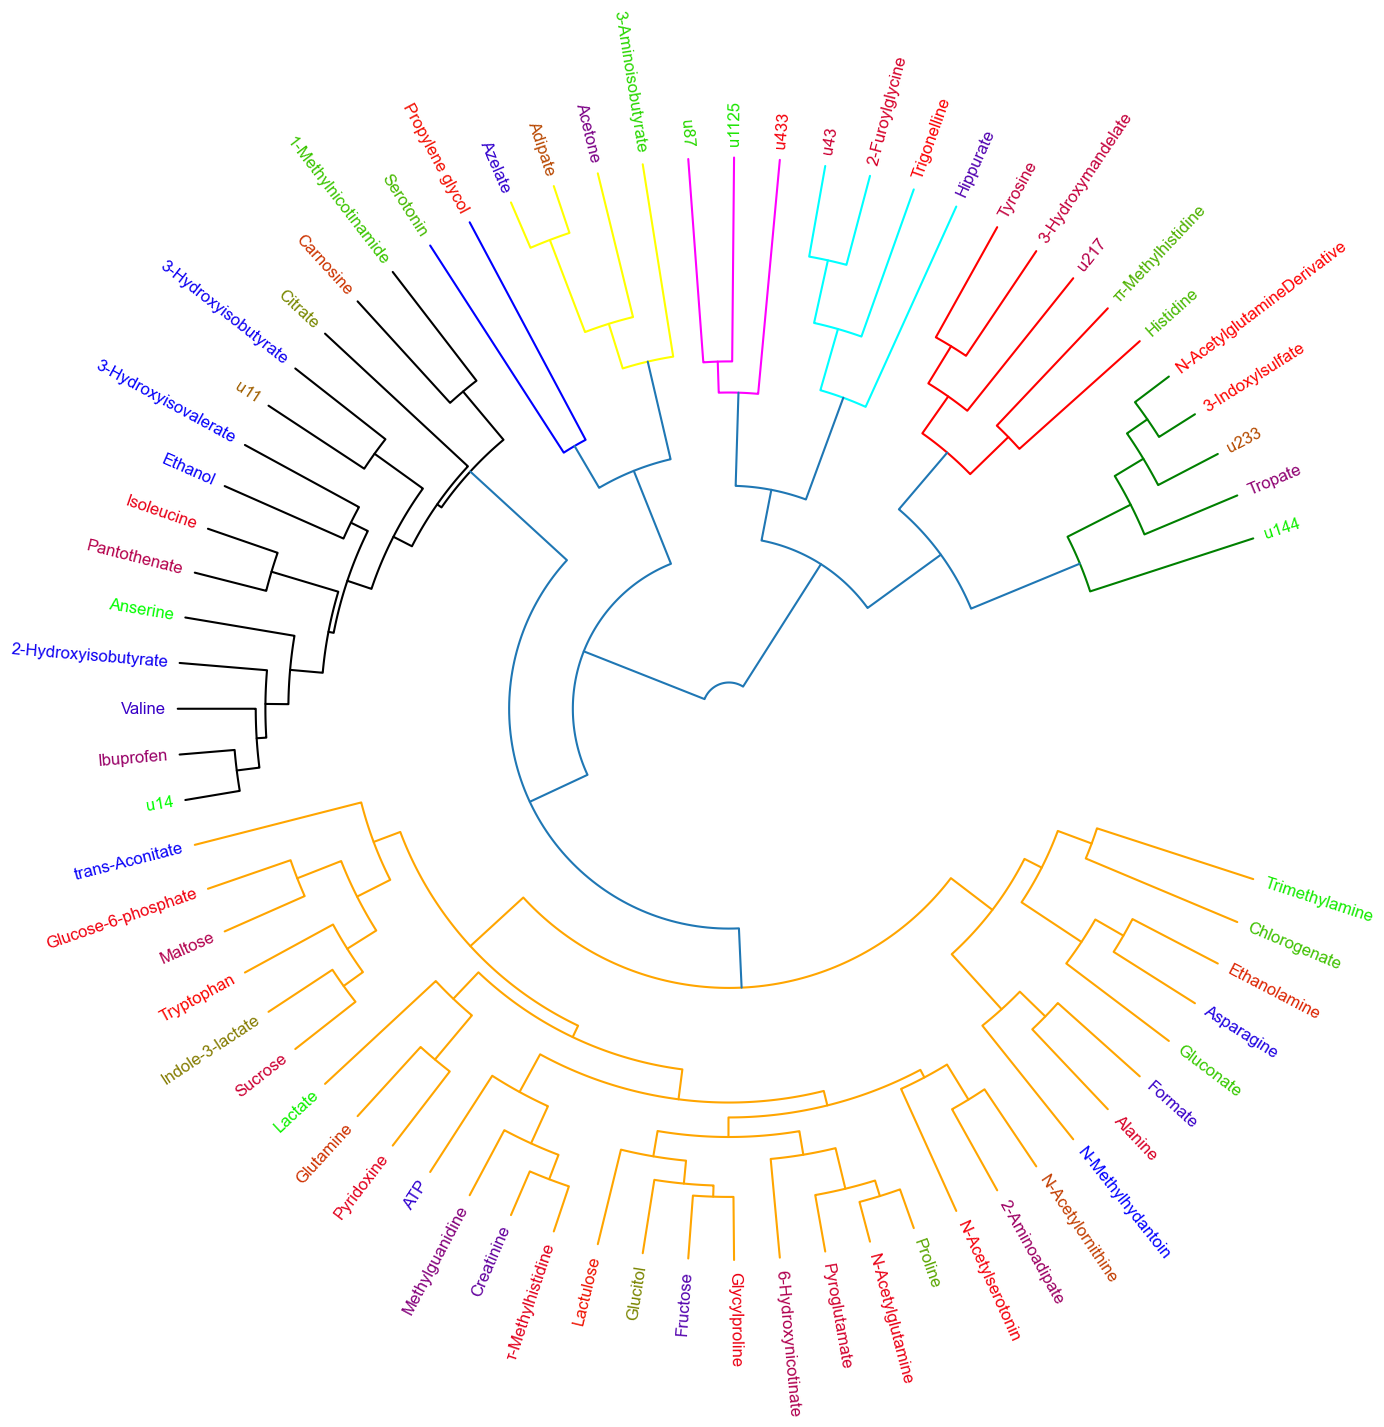

In [20]:
text_params = dict({'fontSize': 12
                    , 'textColorScale': 'linear'         #The scale to use for colouring the text
                    , 'text_color_column': 'Pvalue'      #If text_color_column set to colour values it overides the use of text_cmap
                    , 'label_column': 'Label'            #The column to label the branches by
                    , 'text_cmap': 'brg'})               #The colour map to use for the labels

general_params = dict({'imageFileName': 'polarDendrogram_gastric_cancer.png'    #File name to save image to
                       , 'PeakTable': PeakTableClean             #The Peak Table
                       , 'DataTable': DataTableClean             #The Data Table
                       , 'group_column_name': 'Class'            #The group column name used in the datatable (e.g. 'Class') 
                       , 'saveImage': True                       #If setting to 'True' saves the image
                       , 'branch_scale': 'linear'                #Scale factor for the branches ('linear', 'log', 'square')
                       , 'gap': 0.1                              #Gap size within polar dengrogram
                       , 'grid': False                           #Overlay a grid over the polar dendrogram           
                       , 'style': 'seaborn-v0_8-white'           #Seaborn style to apply
                       , 'transparent': False                    #If 'True' sets the background of all plots to transparent
                       , 'dpi': 200                              #The DPI of the image
                       , 'figSize': (15,15)})                    #Figure size (width,height)

polarDendro.set_params(**general_params,**text_params)

polarDendro.build()

<div style="background-color:rgb(255, 250, 250); padding:10px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

## 11. Plot Peak Area of each cluster
     
The combined peak areas of features within each cluster are plotted to show and compare their trajectories. An option to produce different plots (either mean/median point plot, violin, box, swarm, violin-swarm, or box-swarm), log ('natural', base 2 or base 10), scale the data to unit variance, and impute the data using KNN (to a set number of neighrest neighbours) and save the resulting image is provided. The clusters are labelled alphabetically anti-clockwise from the polar dendrogram.
    
Note1: If plotting with point plot and the data is non-normally distributed it is recommended to use a median estimator.
    
Note2: If the data is non-normally distributed it is recommended to scale using the 'minmax' scaler, which scales each feature between 0 and 1, however if obvious outliers are present it is better to scale using the 'robust' scaler. Alternatively the 'maxabs' scaler can be used and can perform similarly to the 'minmax' scaler if the data is positive. The 'minmax' and 'maxabs' scaling methods maintain the shape of the distribution, unlike the 'standard' method which centers around a mean of 0 and scales to a standard deviation of 1. The 'robust' method centers around the median and scales to a lower and upper quantile range, and is robust to the presence of outliers. To see how different scaling methods affect the data, swap out 'minmax' for: 'standard', 'maxabs, and 'robust' and see how the plots change.
    
Note3: Clusters not assigned a colour in the polar dendrogram are not included in the peak area plot, as clusters are categorised by their assigned colour. In such a case, try adjusting the colour threshold or try a different similarity/distance metric and/or linkage method at the HCA step to include them.   
</div>

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Median Peak Area Point plot
</div>

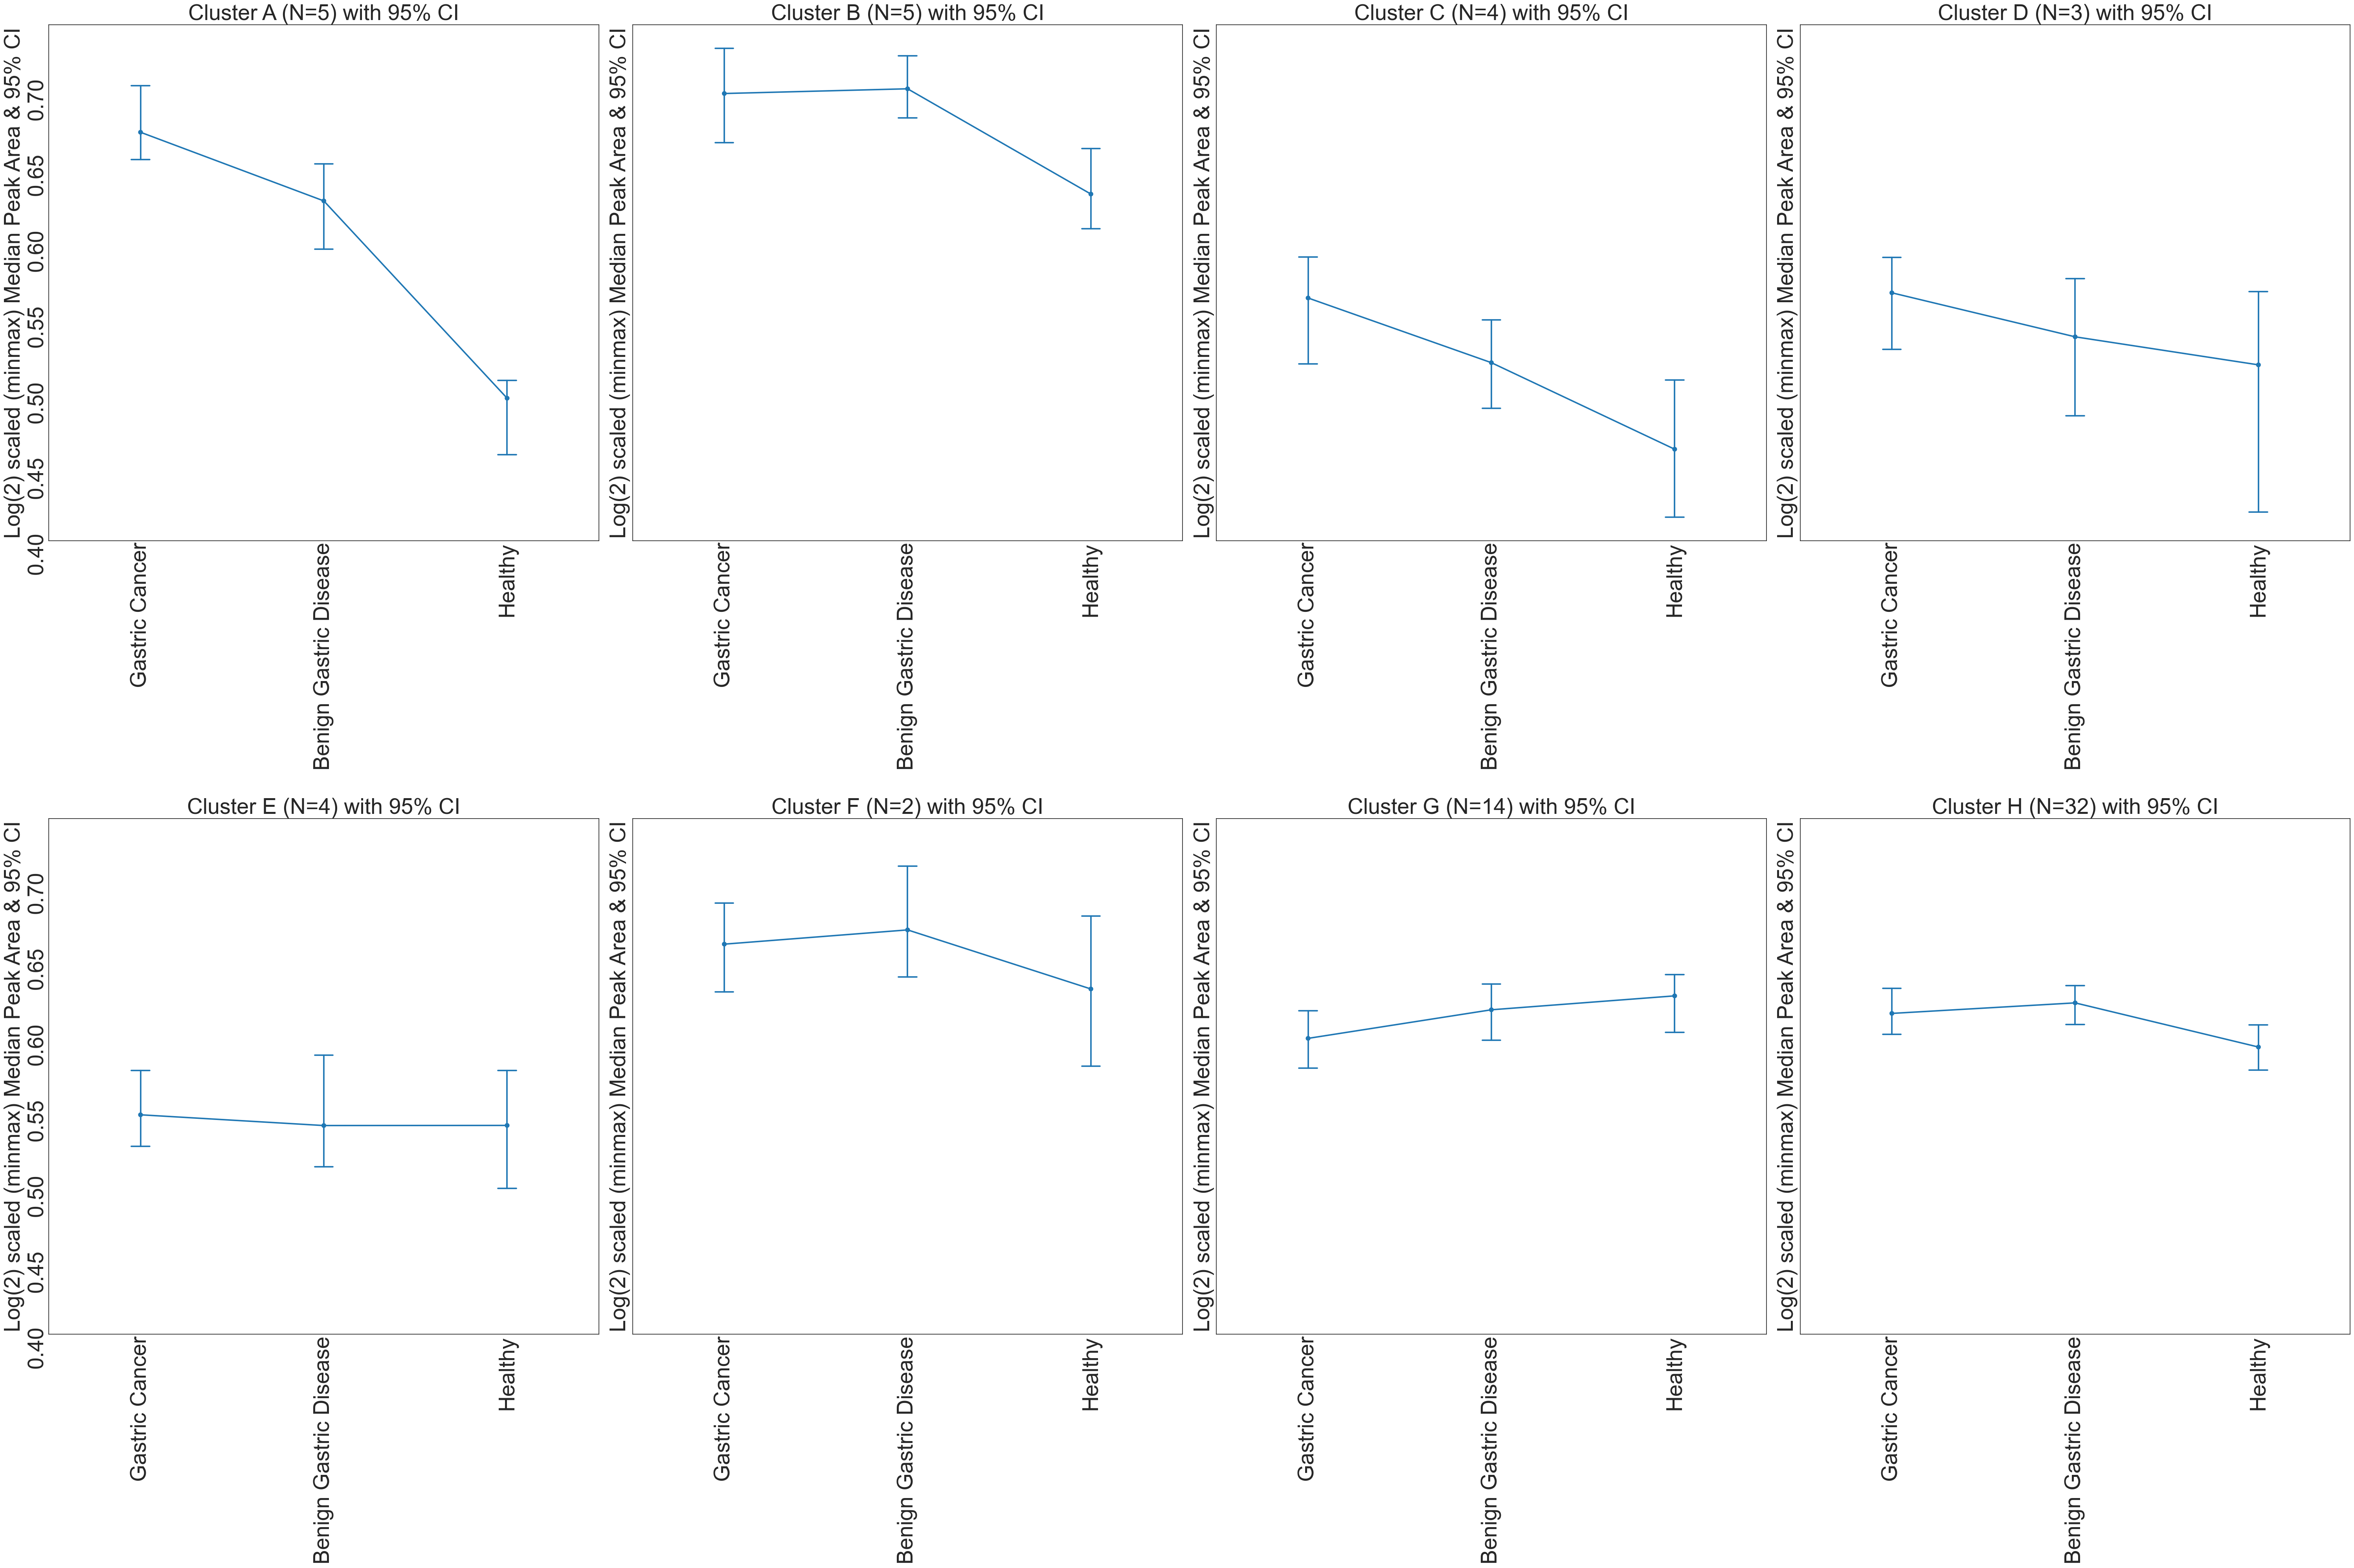

In [21]:
polarDendro.plotClusters(plot_type='point', column_numbers=4, log_data=(True, 2), scale_data=(True, 'minmax'), impute_data=(True, 3), figSize=(60,40), fontSize=40, colour_palette=None, y_axis_label=None, point_estimator='median', x_axis_rotation=90, point_ci=95, saveImage=True, imageFileName='_clusters_gastric_cancer.png', dpi=200)

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Peak Area Violin plot
</div>

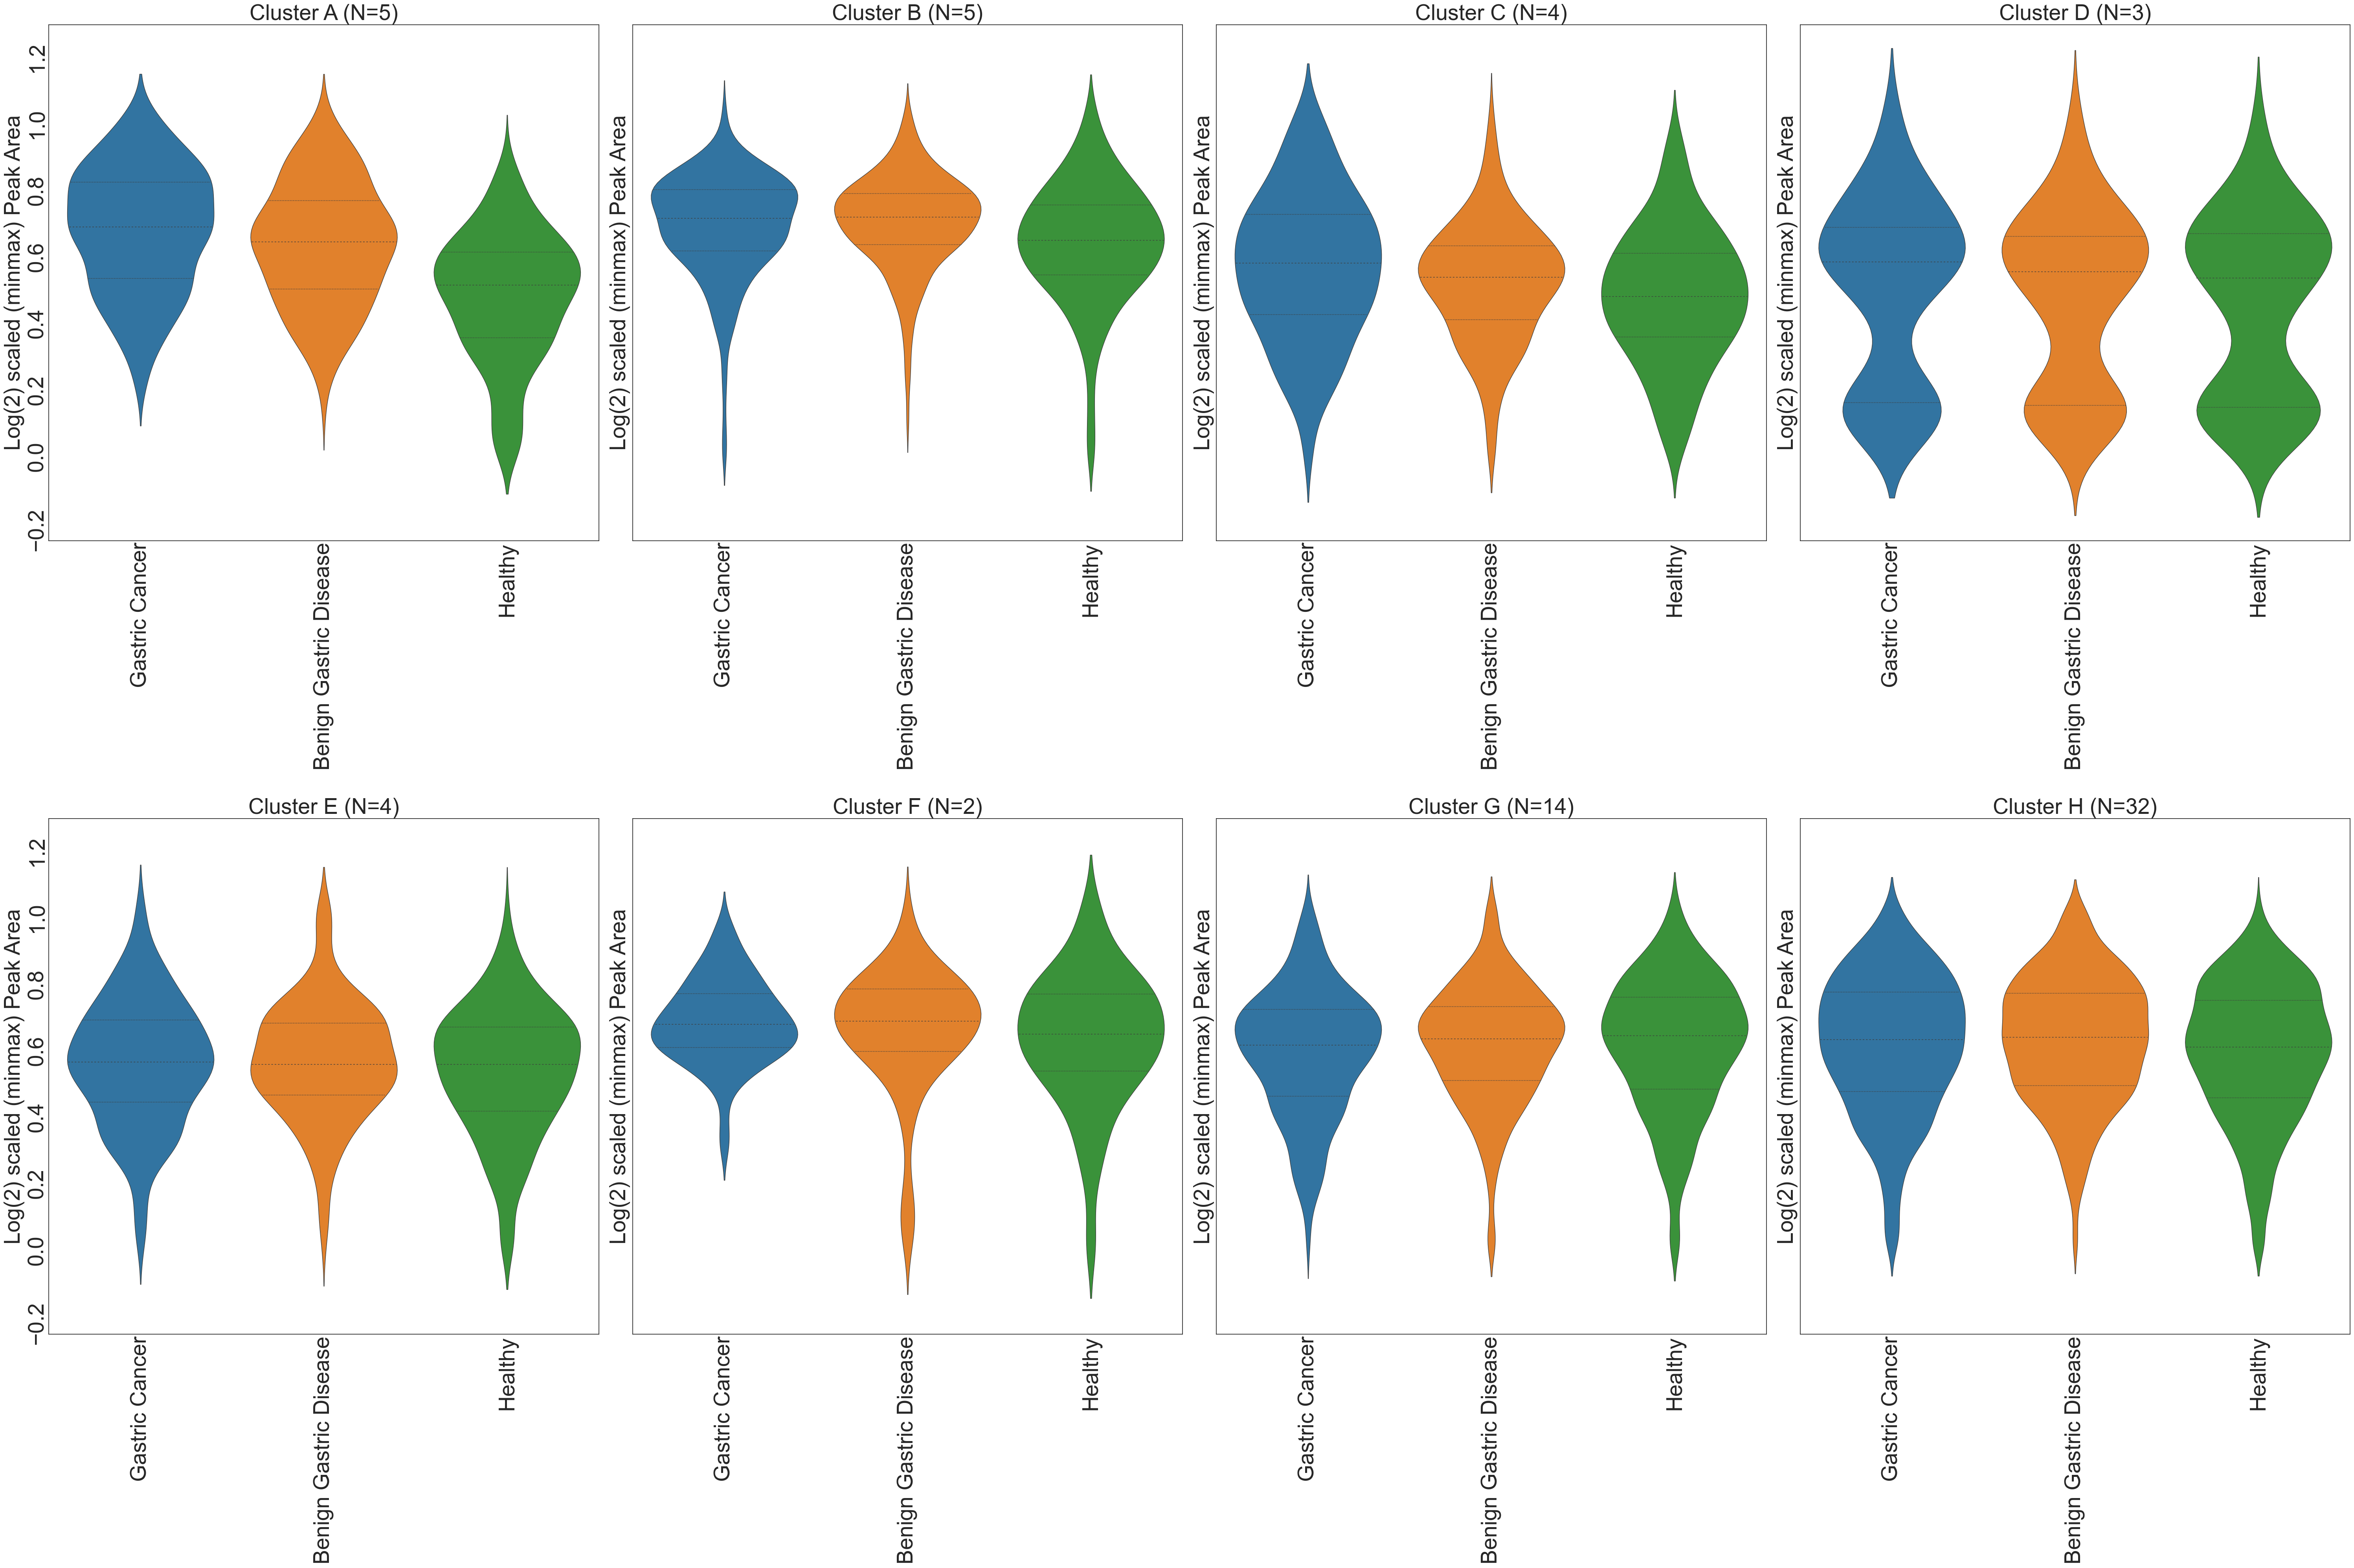

In [22]:
polarDendro.plotClusters(plot_type='violin', column_numbers=4, log_data=(True, 2), scale_data=(True, 'minmax'), impute_data=(True, 3), figSize=(60,40), fontSize=40, colour_palette=None, violin_distribution_type='quartile', violin_width_scale = 'width', y_axis_label=None, x_axis_rotation=90, saveImage=True, imageFileName='_clusters_gastric_cancer.png', dpi=200)

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Peak Area Box plot
</div>

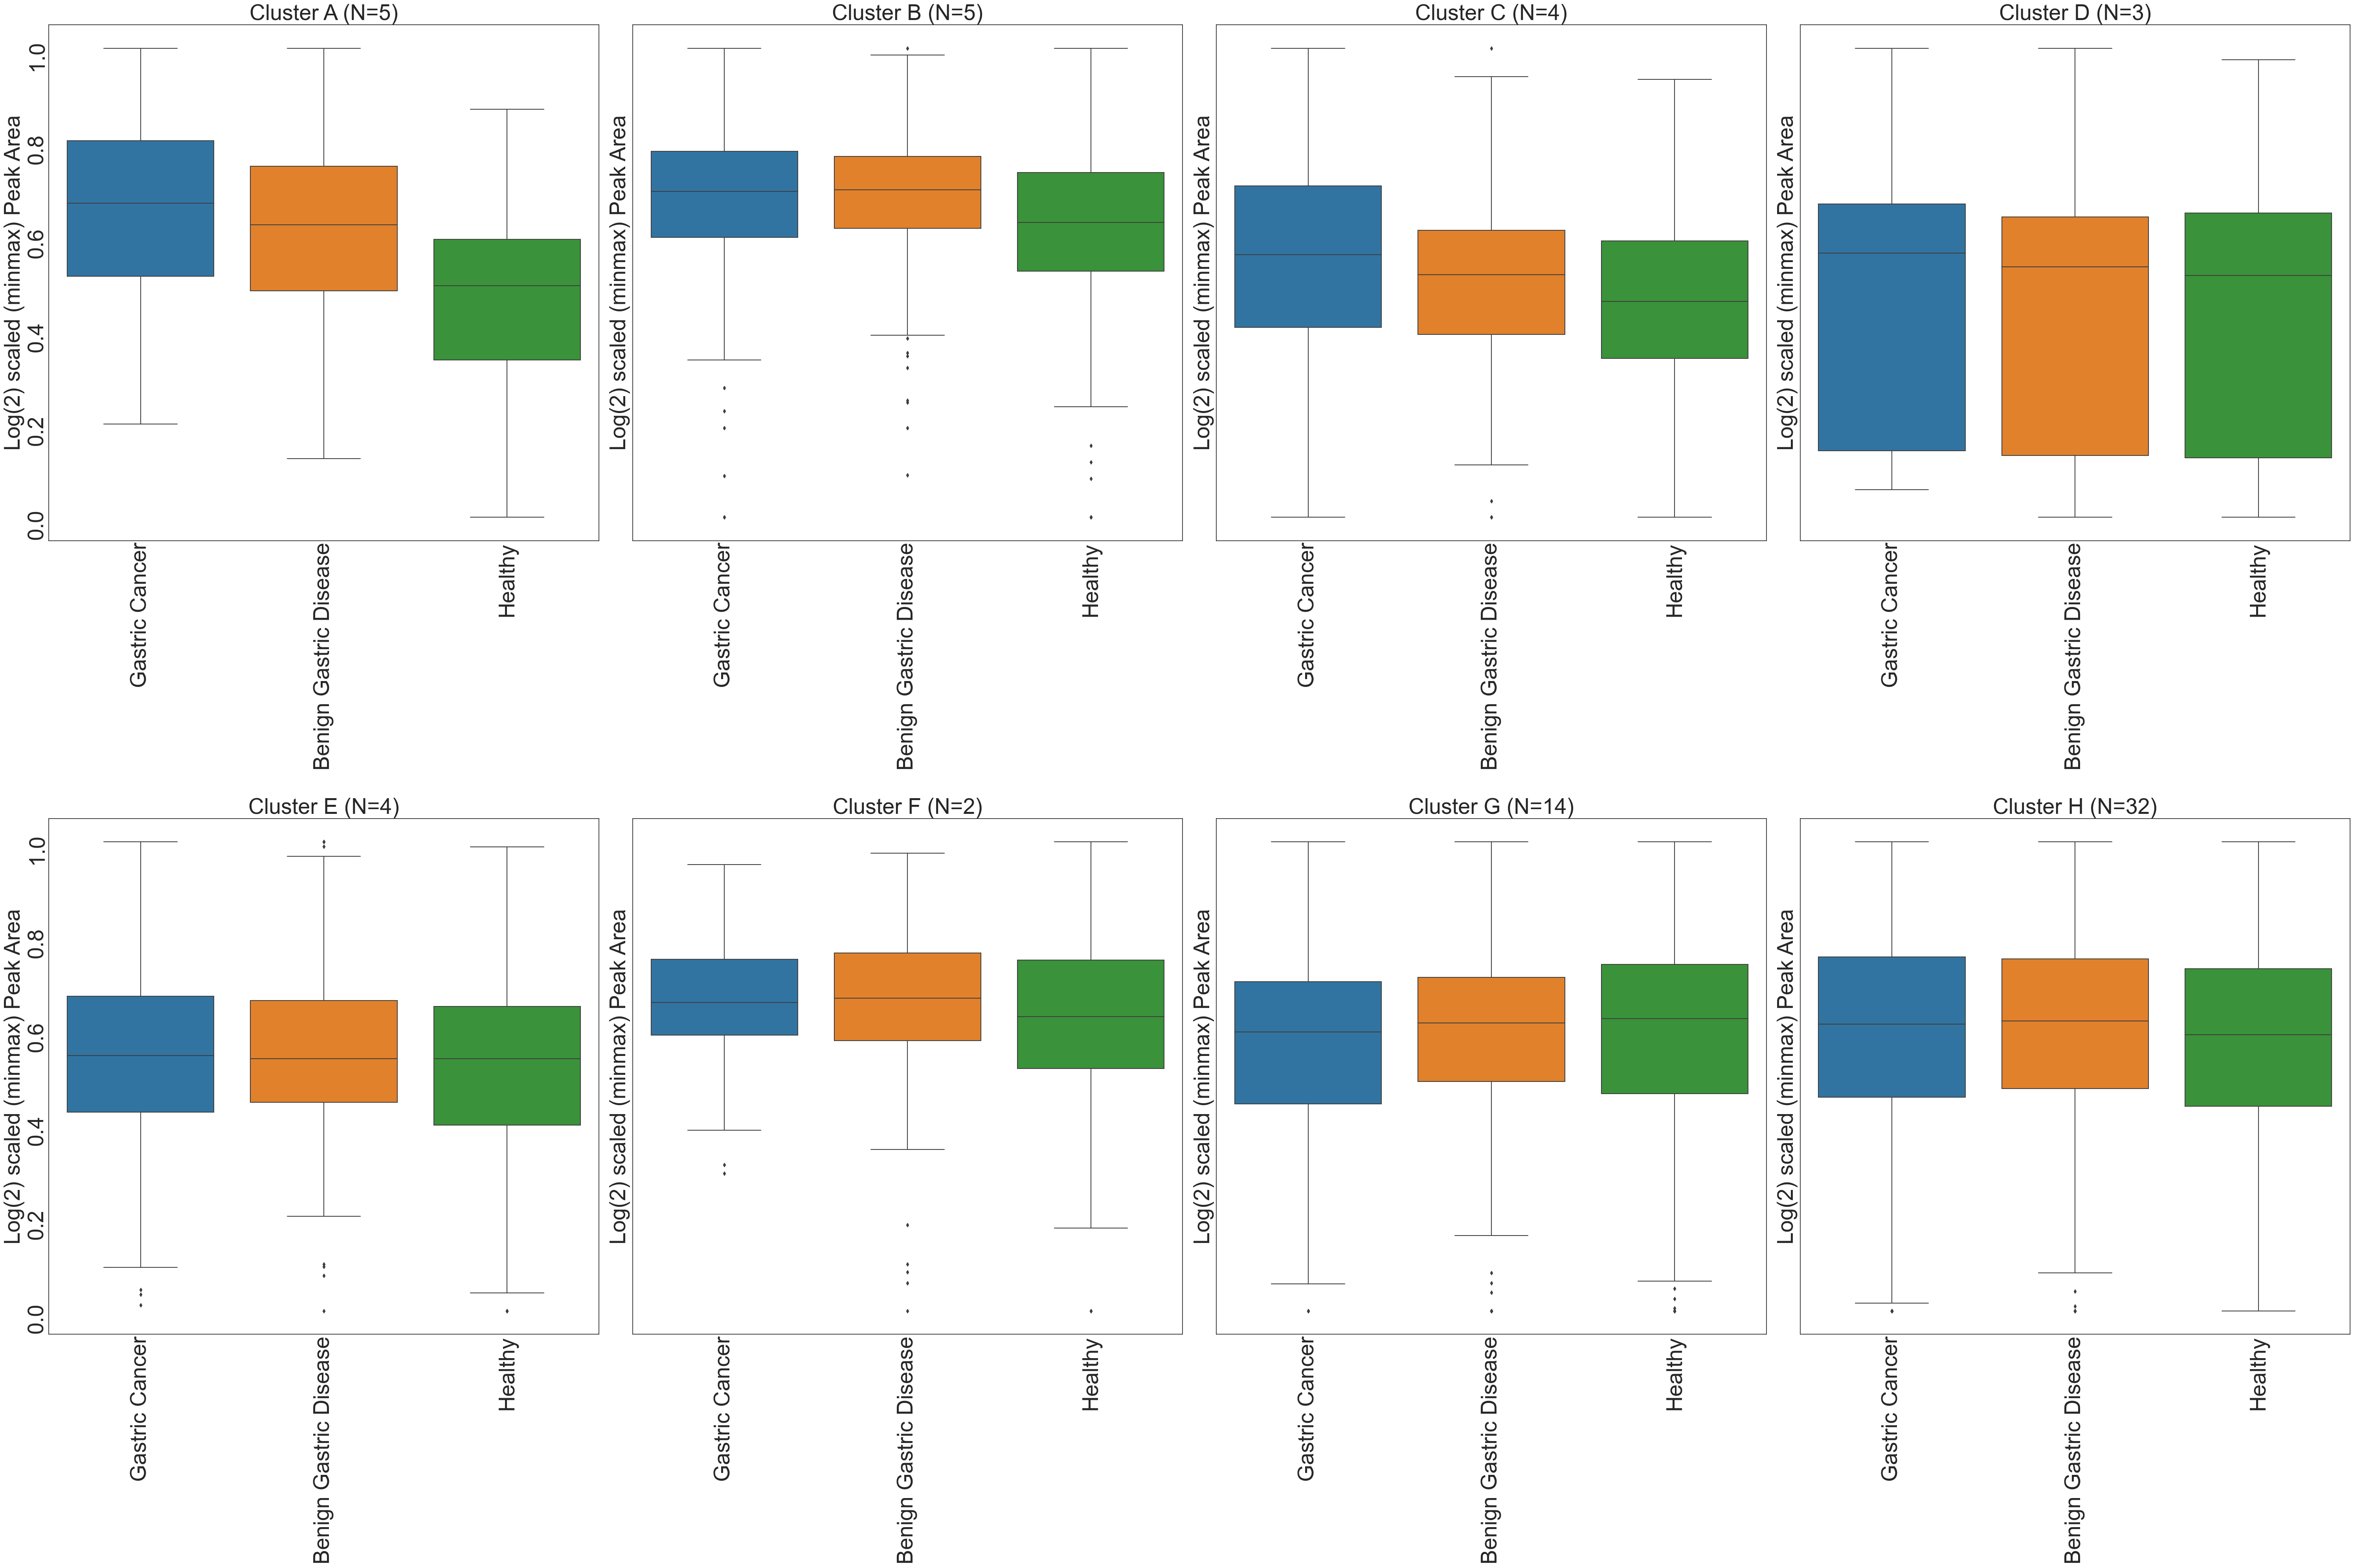

In [23]:
polarDendro.plotClusters(plot_type='box', column_numbers=4, log_data=(True, 2), scale_data=(True, 'minmax'), impute_data=(True, 3), figSize=(60,40), fontSize=40, colour_palette=None, box_iqr=1.5, y_axis_label=None, x_axis_rotation=90, saveImage=True, imageFileName='_clusters_gastric_cancer.png', dpi=200)

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Peak Area Swarm plot
</div>

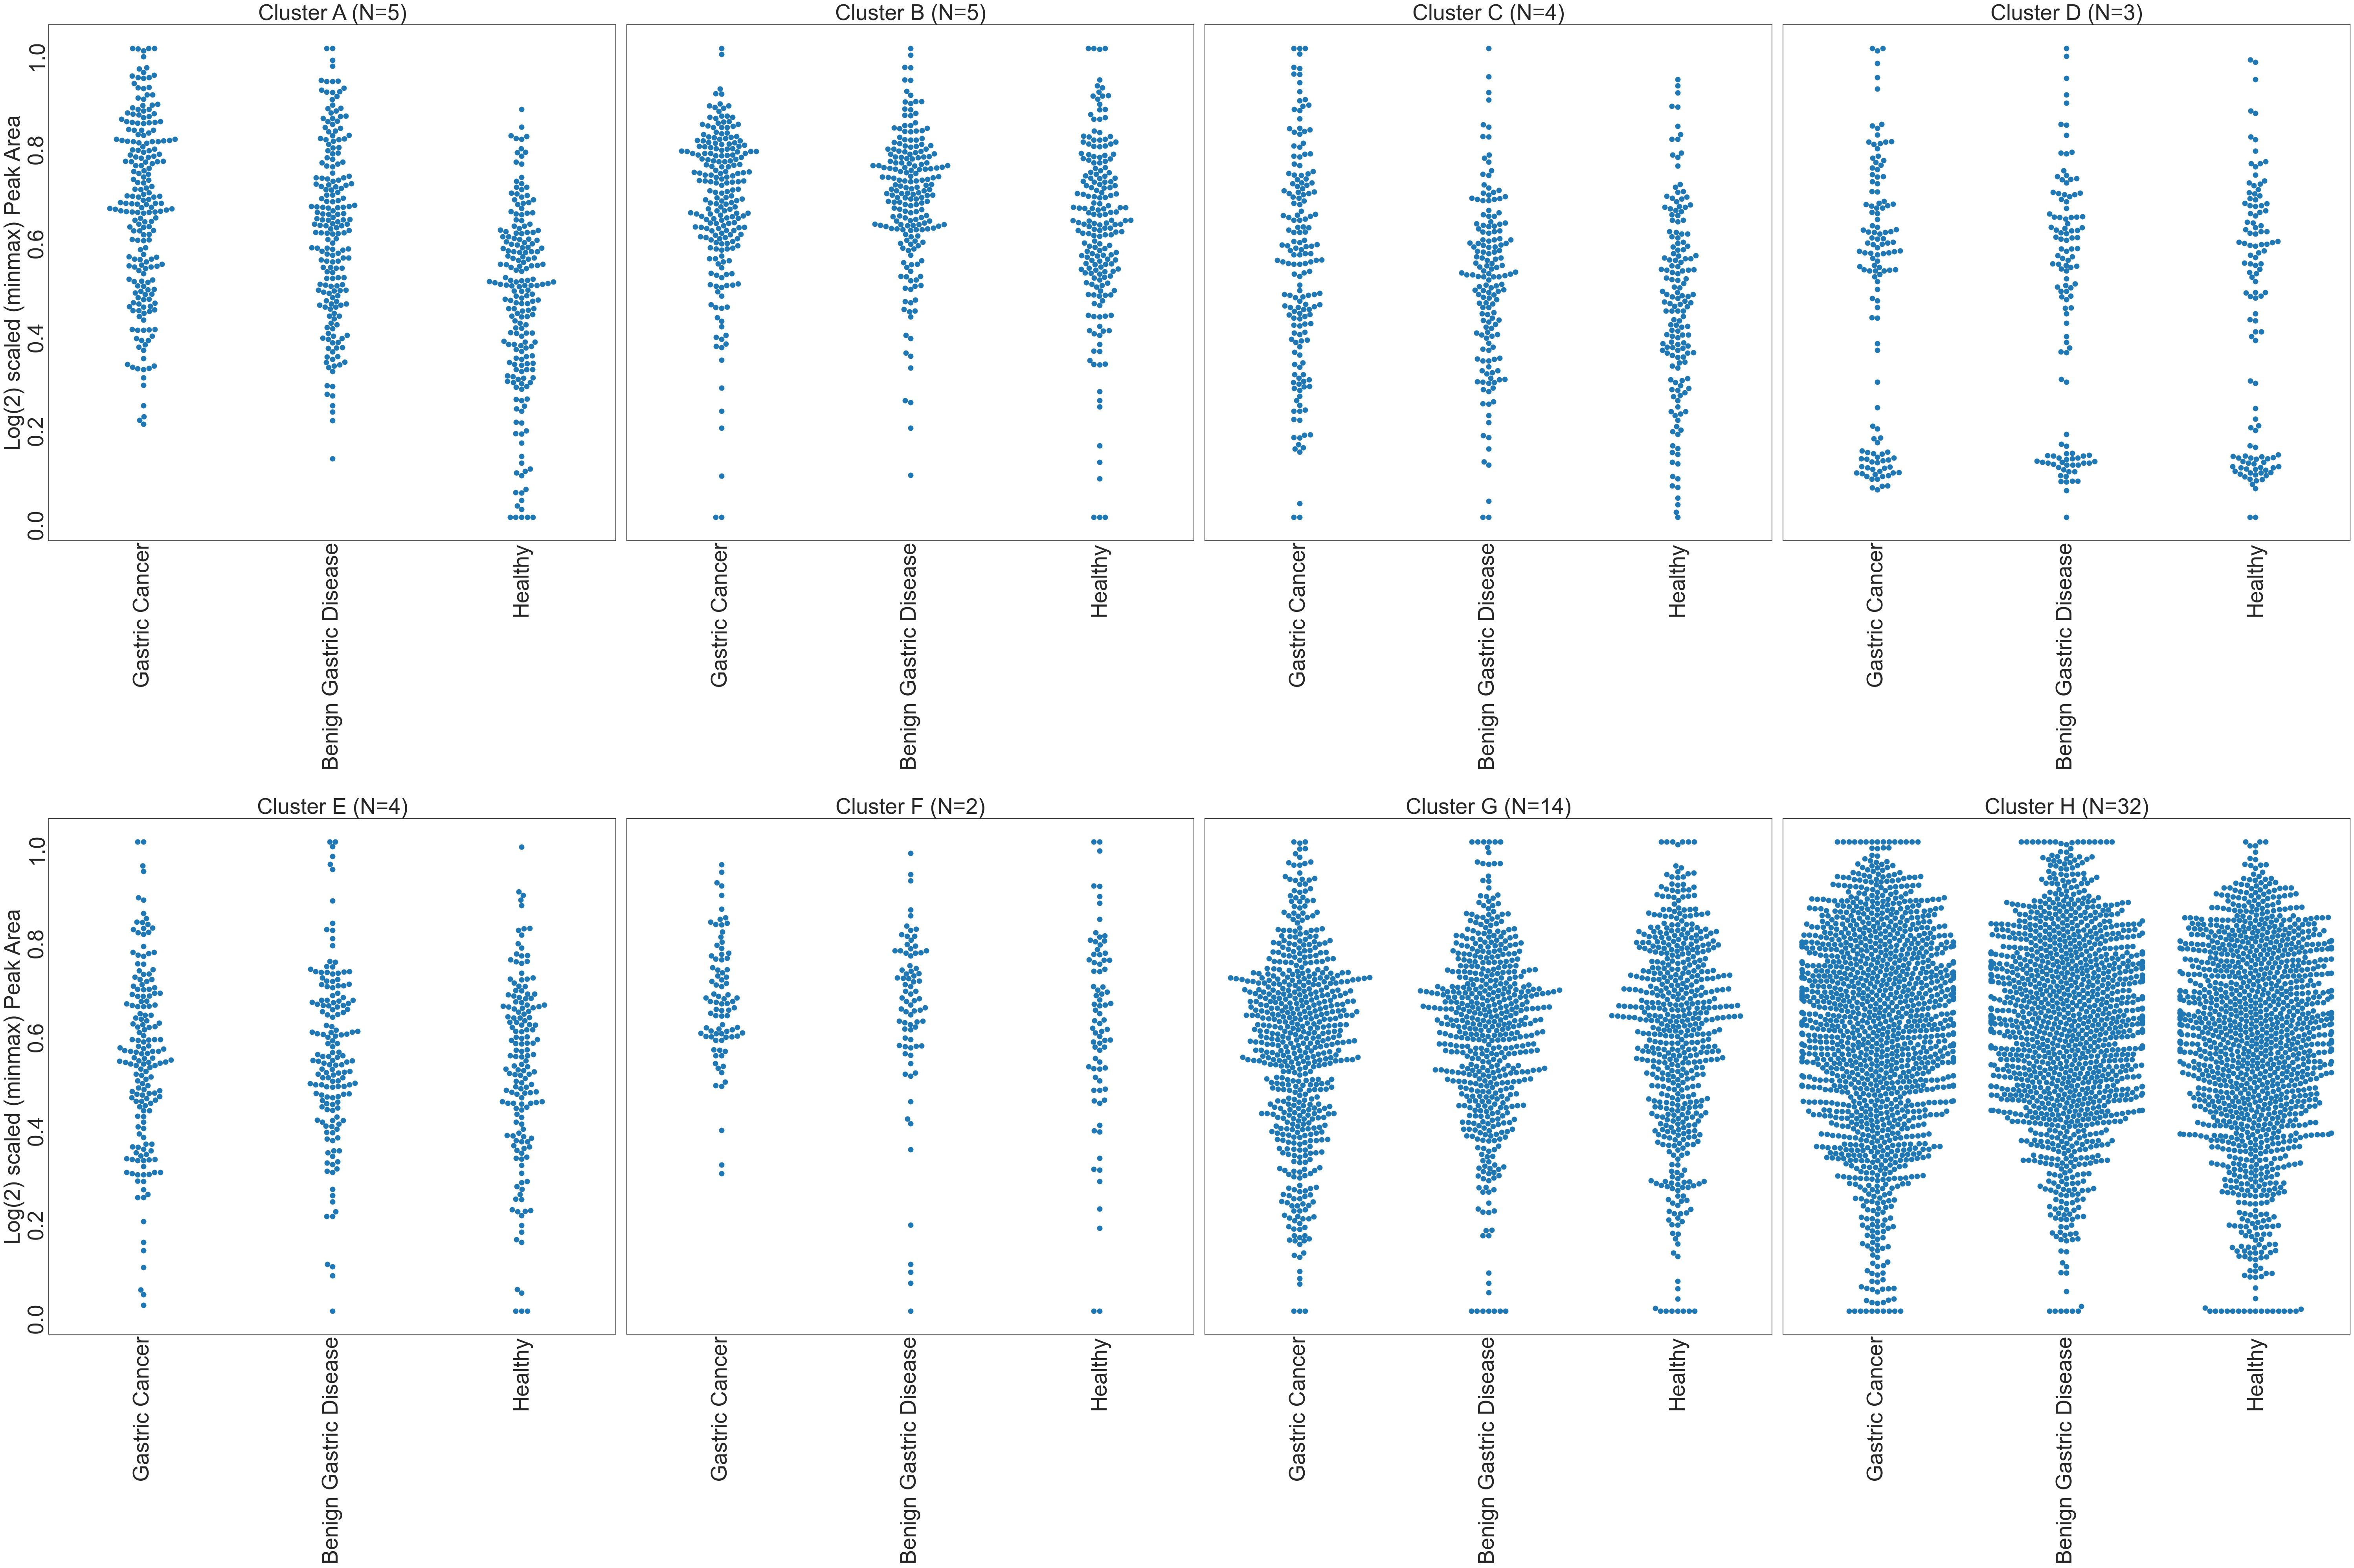

In [24]:
polarDendro.plotClusters(plot_type='swarm', column_numbers=4, log_data=(True, 2), scale_data=(True, 'minmax'), impute_data=(True, 3), figSize=(60,40), fontSize=40, colour_palette=None, y_axis_label=None, x_axis_rotation=90, saveImage=True, imageFileName='_clusters_gastric_cancer.png', dpi=200)

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Peak Area Violin-Swarm plot
</div>

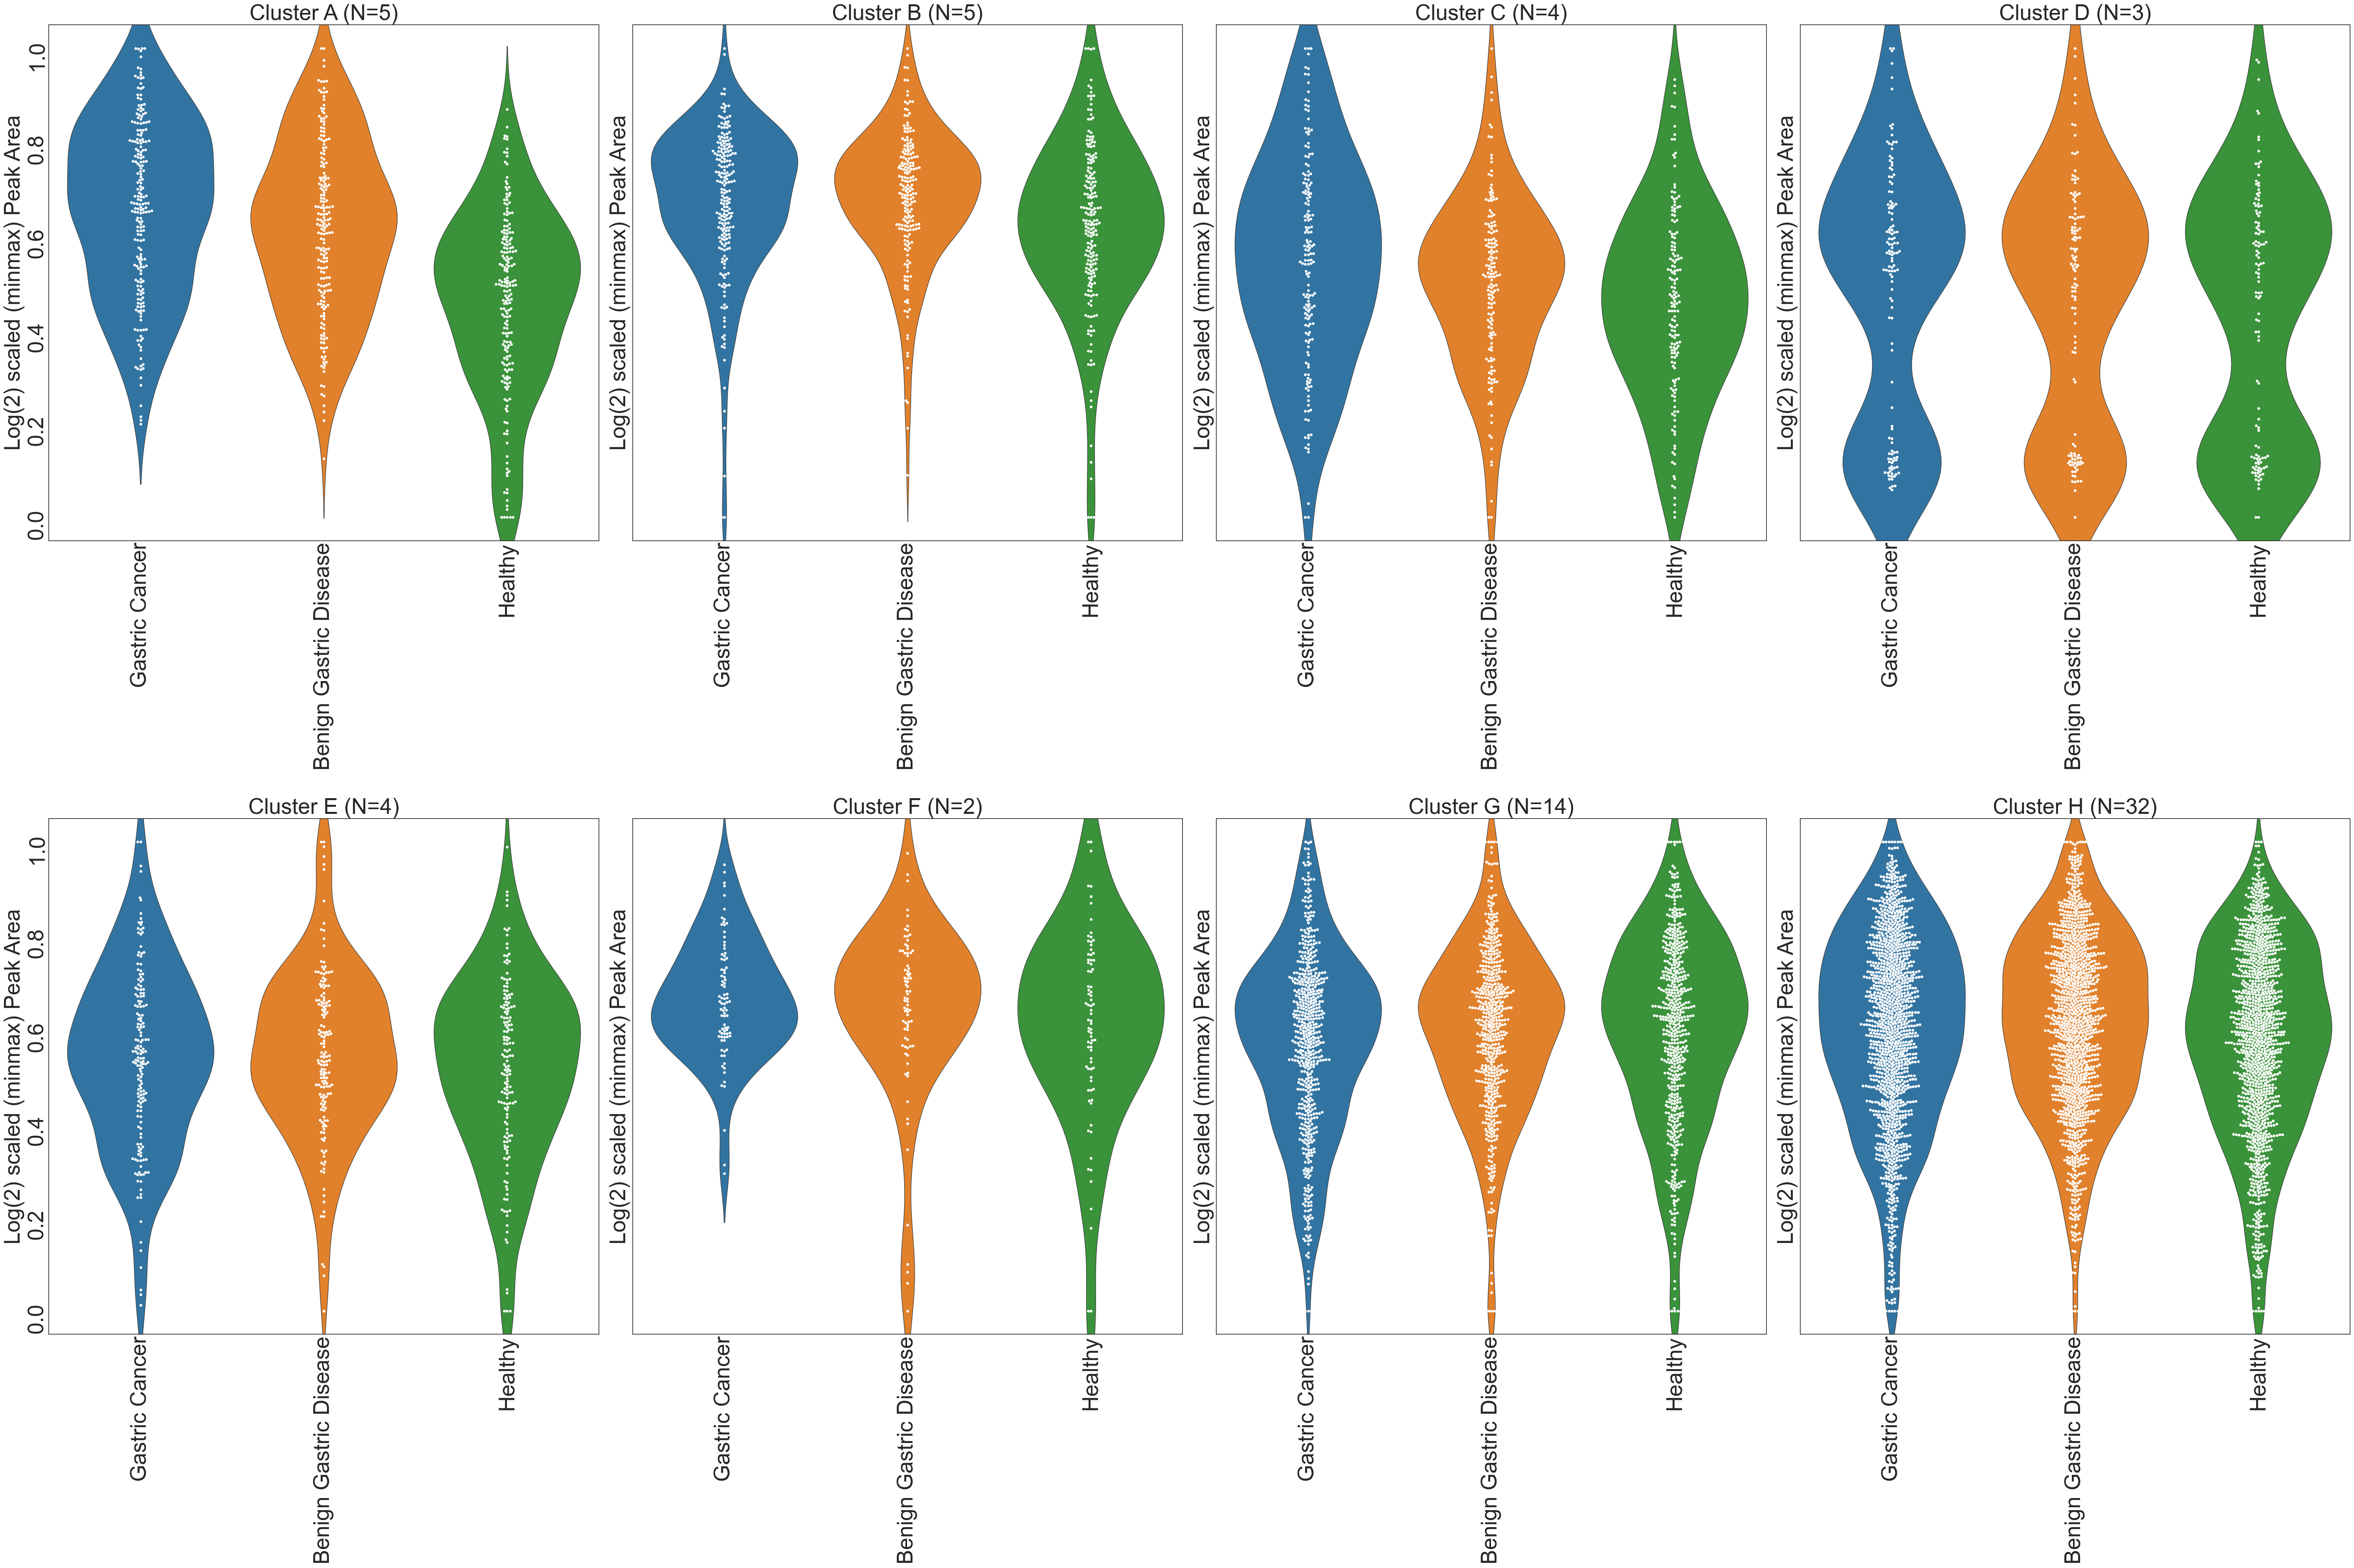

In [25]:
polarDendro.plotClusters(plot_type='violin-swarm', column_numbers=4, log_data=(True, 2), scale_data=(True, 'minmax'), impute_data=(True, 3), figSize=(60,40), fontSize=40, colour_palette=None, violin_distribution_type='quartile', violin_width_scale = 'width', y_axis_label=None, x_axis_rotation=90, saveImage=True, imageFileName='_clusters_gastric_cancer.png', dpi=200)

<div style="background-color:rgb(255, 250, 250); padding:5px;  border: 1px solid lightgrey; padding-left: 1em; padding-right: 1em;">

### Peak Area Box-Swarm plot
</div>

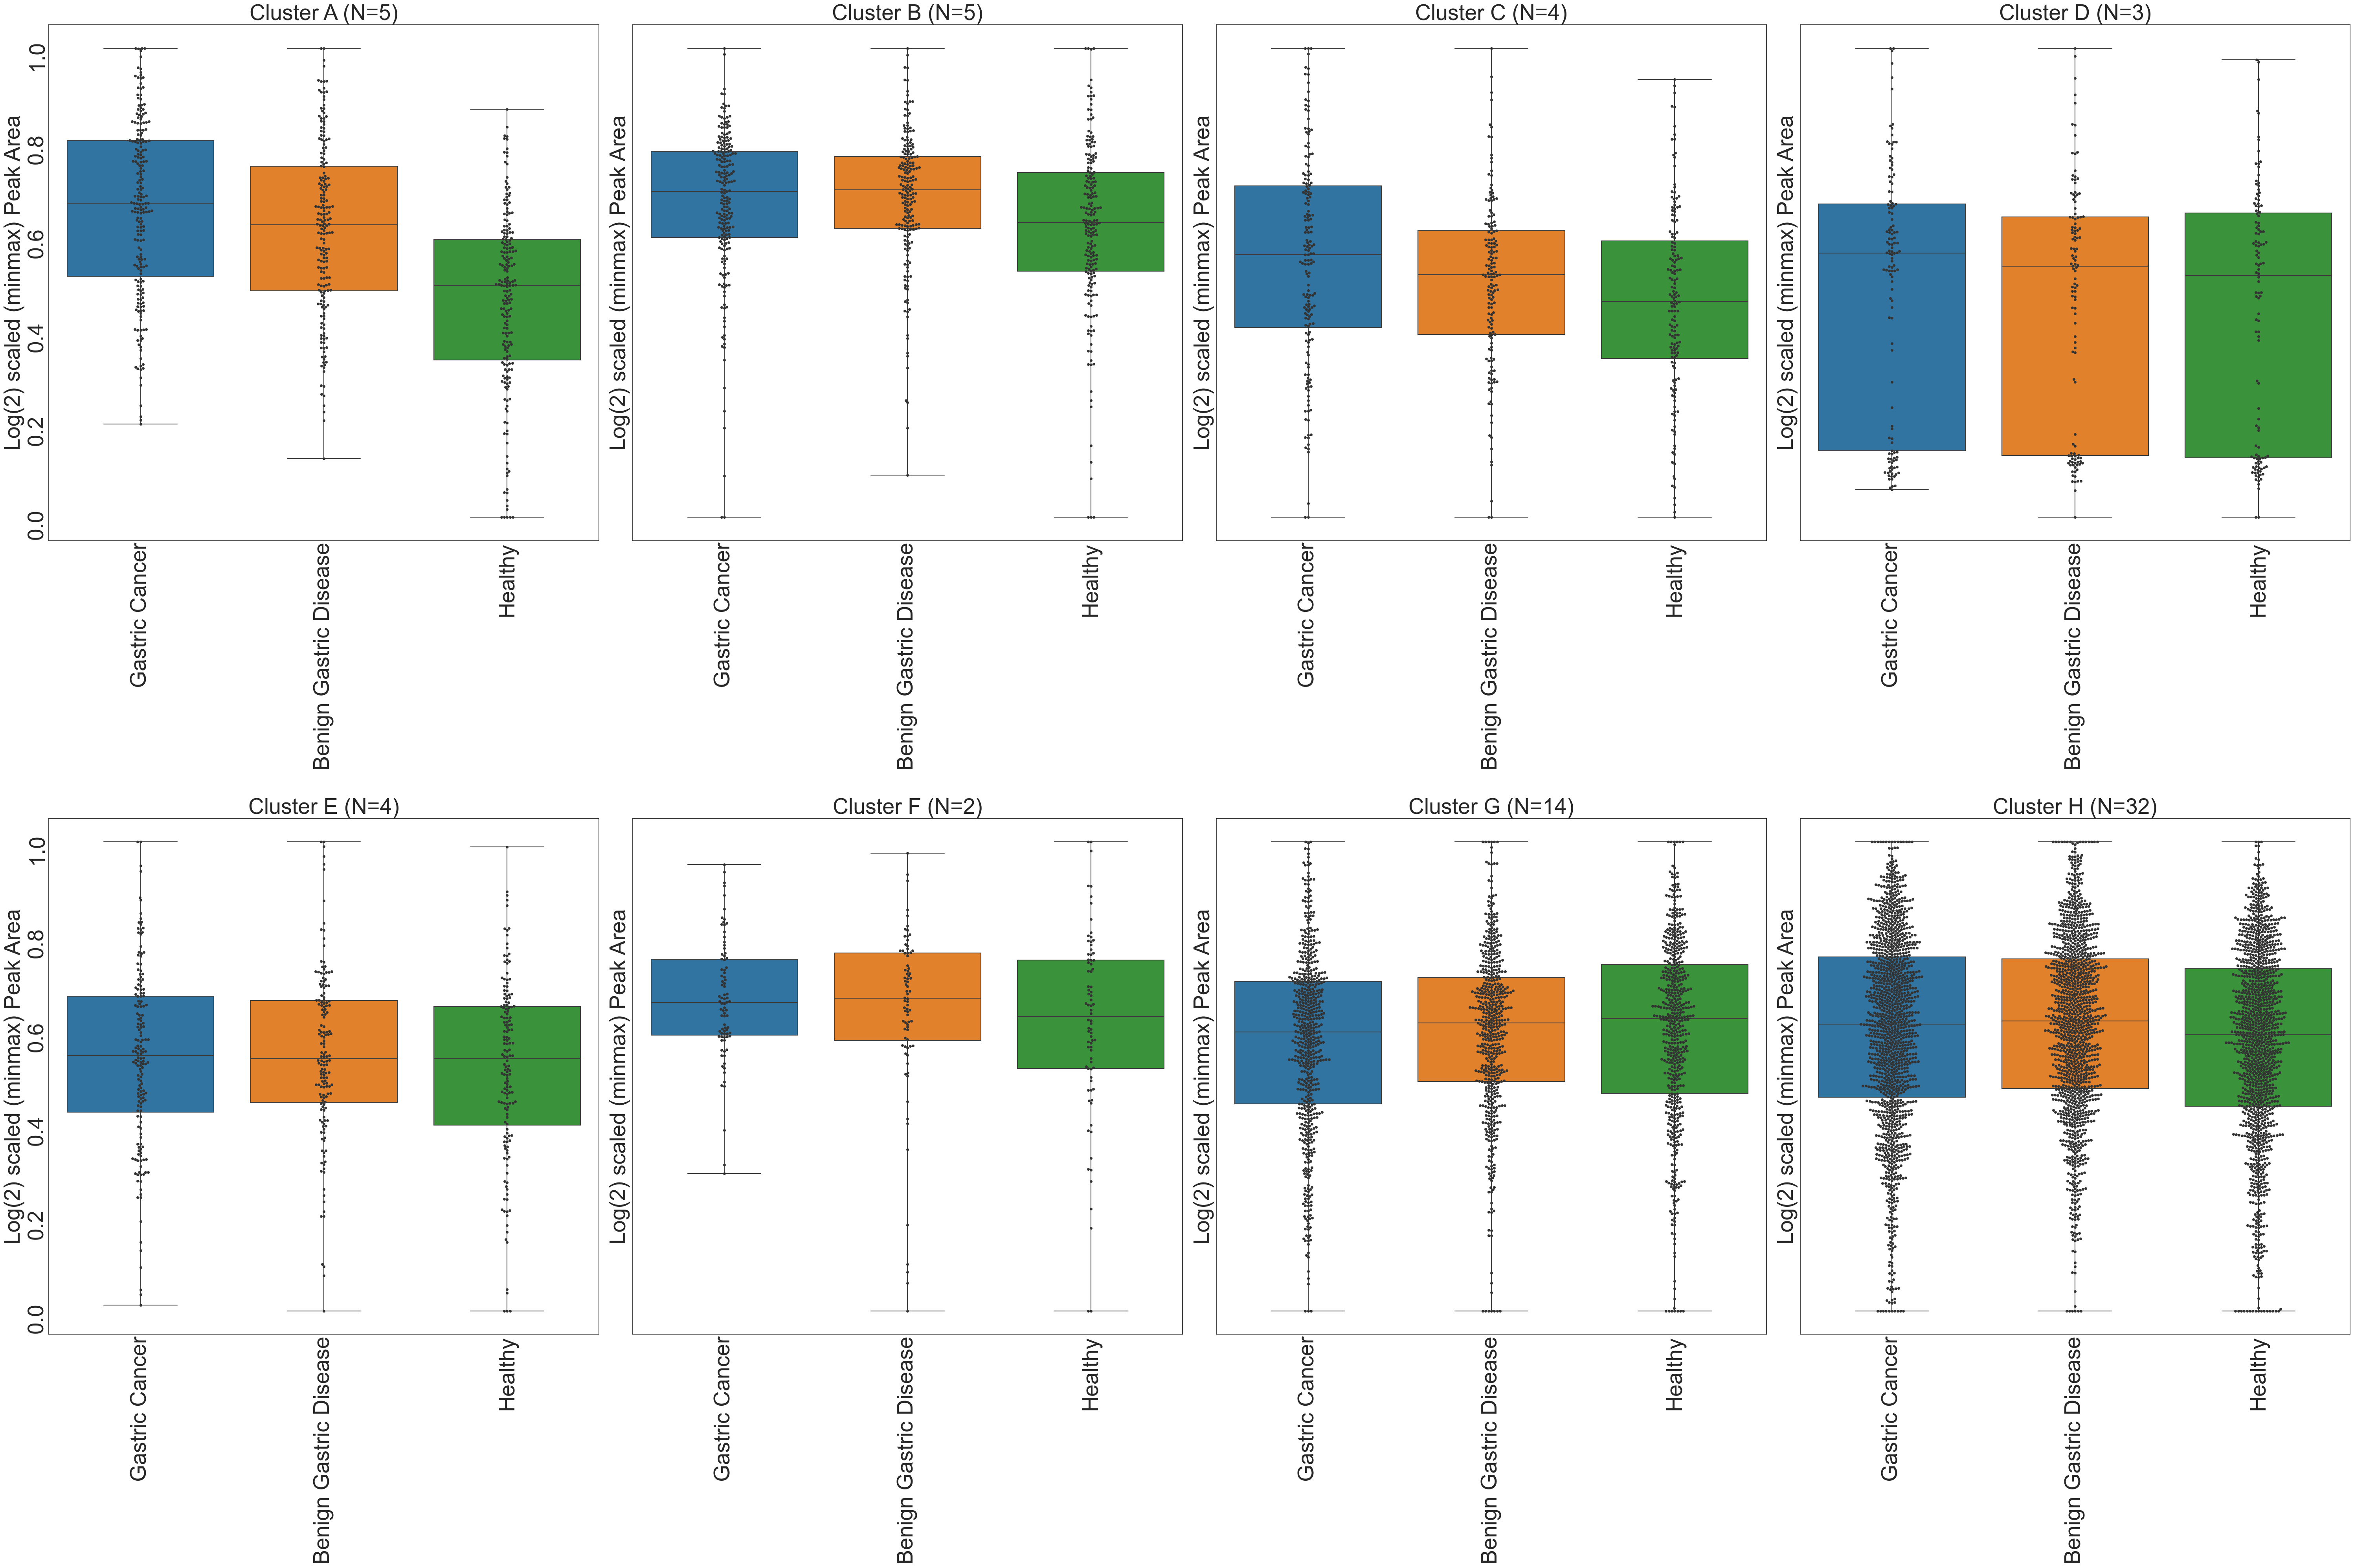

In [26]:
polarDendro.plotClusters(plot_type='box-swarm', column_numbers=4, log_data=(True, 2), scale_data=(True, 'minmax'), impute_data=(True, 3), figSize=(60,40), fontSize=40, colour_palette=None, y_axis_label=None, x_axis_rotation=90, saveImage=True, imageFileName='_clusters_gastric_cancer.png', dpi=200)